In [44]:
import librosa
import librosa.display
import librosa2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import natsort
from openpyxl import load_workbook
import scipy.io
import scipy
import random

In [13]:
#extaract mfcc of single audio file
filename = 'music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/musan/music/fma/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
d = 0
y,sr = librosa.load(audio_file, sr=44100, duration=5)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
mfcc_pre = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_pre = librosa.feature.delta(mfcc_pre)
deltaDelta_pre = librosa.feature.delta(mfcc_pre, order=2)

#write to csv
to_append = f'{filename} ' 
#average psd per filterbank and write to file
for i in mfcc_pre:
    to_append += f' {np.mean(i)}' 
    to_append += f' {np.var(i)}' 
#average speed
for j in delta_pre:
    to_append += f' {np.mean(j)}'
    to_append += f' {np.var(j)}'
#average acceleration
for k in deltaDelta_pre:
    to_append += f' {np.mean(k)}'
    to_append += f' {np.var(k)}'
#write label to file
to_append += f' {d}'
file = open(newFileName, 'a', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(to_append.split())

In [14]:
#extaract mfcc of single audio file
filename = '0_h_10_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/audio_selection_data6/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
d = 0
y,sr = librosa.load(audio_file, sr=44100)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
mfcc_post_10 = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_post_10 = librosa.feature.delta(mfcc_post_10)
deltaDelta_post_10 = librosa.feature.delta(mfcc_post_10, order=2)

#write to csv
to_append = f'{filename} ' 
#average psd per filterbank and write to file
for i in mfcc_post_10:
    to_append += f' {np.mean(i)}' 
    to_append += f' {np.var(i)}' 
#average speed
for j in delta_post_10:
    to_append += f' {np.mean(j)}'
    to_append += f' {np.var(j)}'
#average acceleration
for k in deltaDelta_post_10:
    to_append += f' {np.mean(k)}'
    to_append += f' {np.var(k)}'
#write label to file
to_append += f' {d}'
file = open(newFileName, 'a', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(to_append.split())

In [15]:
#extaract mfcc of single audio file
filename = '0_h_10_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/audio_selection_data6/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
d = 0
y,sr = librosa.load(audio_file, sr=44100)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
mfcc_post_1000 = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_post_1000 = librosa.feature.delta(mfcc_post_1000)
deltaDelta_post_1000 = librosa.feature.delta(mfcc_post_1000, order=2)

#write to csv
to_append = f'{filename} ' 
#average psd per filterbank and write to file
for i in mfcc_post_1000:
    to_append += f' {np.mean(i)}' 
    to_append += f' {np.var(i)}' 
#average speed
for j in delta_post_1000:
    to_append += f' {np.mean(j)}'
    to_append += f' {np.var(j)}'
#average acceleration
for k in deltaDelta_post_1000:
    to_append += f' {np.mean(k)}'
    to_append += f' {np.var(k)}'
#write label to file
to_append += f' {d}'
file = open(newFileName, 'a', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(to_append.split())

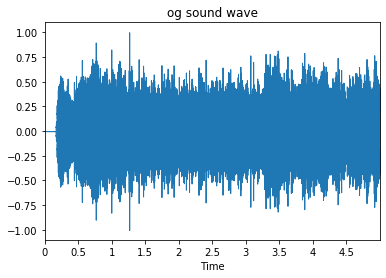

In [16]:
librosa.display.waveplot(y, sr=sr)
plt.title('og sound wave');

In [5]:
from sklearn.preprocessing import StandardScaler
#normalize both mfcc
scaler = StandardScaler()
mfcc_pre = scaler.fit_transform(np.array(mfcc_pre, dtype = float))
delta_pre = scaler.fit_transform(np.array(mfcc_pre, dtype = float))
mfcc_post_10 = scaler.fit_transform(np.array(mfcc_post_10, dtype = float))
mfcc_post_1000 = scaler.fit_transform(np.array(mfcc_post_1000, dtype = float))

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_pre, x_axis='time', sr=44100)
plt.colorbar()
plt.title('MFCC-pre')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_post_10, x_axis='time', sr=44100)
plt.colorbar()
plt.title('MFCC-post_10')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_post_1000, x_axis='time', sr=44100)
plt.colorbar()
plt.title('MFCC-post_1000')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(18, 9))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc_pre, x_axis='time', sr=44100, hop_length=256, y_axis='mel')
plt.colorbar()
plt.title('MFCC-pre')
plt.tight_layout()
plt.subplot(3,1,2)
librosa.display.specshow(mfcc_post_10, x_axis='time', hop_length=256, sr=44100, y_axis='mel')
plt.colorbar()
plt.title('MFCC-post_10')
plt.tight_layout()
plt.subplot(3,1,3)
librosa.display.specshow(mfcc_post_1000, x_axis='time', hop_length=256, sr=44100, y_axis='mel')
plt.colorbar()
plt.title('MFCC-post_1000')
plt.tight_layout()
# plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/specs_R.png')
plt.show()

In [ ]:
for coef in range(0,40):
    fig, ax = plt.subplots(1, 3,figsize=(18, 4))
    ax[0].bar(np.arange(len(mfcc_pre[coef,:])),mfcc_pre[coef,:], align='center', alpha=1)
    ax[0].set_xlabel('time frame')
    ax[0].set_title(f'coefficient {coef}-pre')
    ax[1].bar(np.arange(len(mfcc_post_10[coef,:])),mfcc_post_10[coef,:], align='center', alpha=1)
    ax[1].set_xlabel('time frame')
    ax[1].set_title(f'coefficient {coef}-post_10')
    ax[2].bar(np.arange(len(mfcc_post_1000[coef,:])),mfcc_post_1000[coef,:], align='center', alpha=1)
    ax[2].set_xlabel('time frame')
    ax[2].set_title(f'coefficient {coef}-post_1000')
    plt.show()

COMPARE REVERSE AND STANDARD ETC

In [11]:
isReverse = 1

In [12]:
#extaract mfcc of single audio file
filename = 'music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/musan/music/fma/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
d = 0
y,sr = librosa.load(audio_file, sr=44100, duration=5)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
if isReverse:
    mfcc_pre = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
else:
    mfcc_pre = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)

delta_pre = librosa.feature.delta(mfcc_pre)
deltaDelta_pre = librosa.feature.delta(mfcc_pre, order=2)

In [13]:
#extaract mfcc of single audio file
filename = '0_h_100_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/audio_selection_data6/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
y,sr = librosa.load(audio_file, sr=44100)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
if isReverse:
    mfcc_post_0 = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
else:
    mfcc_post_0 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_post_0 = librosa.feature.delta(mfcc_post_0)
deltaDelta_post_0 = librosa.feature.delta(mfcc_post_0, order=2)

In [14]:
#extaract mfcc of single audio file
filename = '90_h_100_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/audio_selection_data6/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
y,sr = librosa.load(audio_file, sr=44100)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
if isReverse:
    mfcc_post_90 = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
else:
    mfcc_post_90 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_post_90 = librosa.feature.delta(mfcc_post_90)
deltaDelta_post_90 = librosa.feature.delta(mfcc_post_90, order=2)

In [15]:
#extaract mfcc of single audio file
filename = '180_h_100_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/audio_selection_data6/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
y,sr = librosa.load(audio_file, sr=44100)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
if isReverse:
    mfcc_post_180 = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
else:
    mfcc_post_180 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_post_180 = librosa.feature.delta(mfcc_post_180)
deltaDelta_post_180 = librosa.feature.delta(mfcc_post_180, order=2)

In [16]:
#extaract mfcc of single audio file
filename = '270_h_100_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/audio_selection_data6/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
y,sr = librosa.load(audio_file, sr=44100)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
if isReverse:
    mfcc_post_270 = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
else:
    mfcc_post_270 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_post_270 = librosa.feature.delta(mfcc_post_270)
deltaDelta_post_270 = librosa.feature.delta(mfcc_post_270, order=2)

In [17]:
from sklearn.preprocessing import StandardScaler
#normalize both mfcc
scaler = StandardScaler()
mfcc_pre = scaler.fit_transform(np.array(mfcc_pre, dtype = float))
delta_pre = scaler.fit_transform(np.array(delta_pre, dtype = float))
mfcc_post_0 = scaler.fit_transform(np.array(mfcc_post_0, dtype = float))
mfcc_post_90 = scaler.fit_transform(np.array(mfcc_post_90, dtype = float))
mfcc_post_180 = scaler.fit_transform(np.array(mfcc_post_90, dtype = float))
mfcc_post_270 = scaler.fit_transform(np.array(mfcc_post_90, dtype = float))

In [18]:
plt.rcParams.update({'font.size': 14})

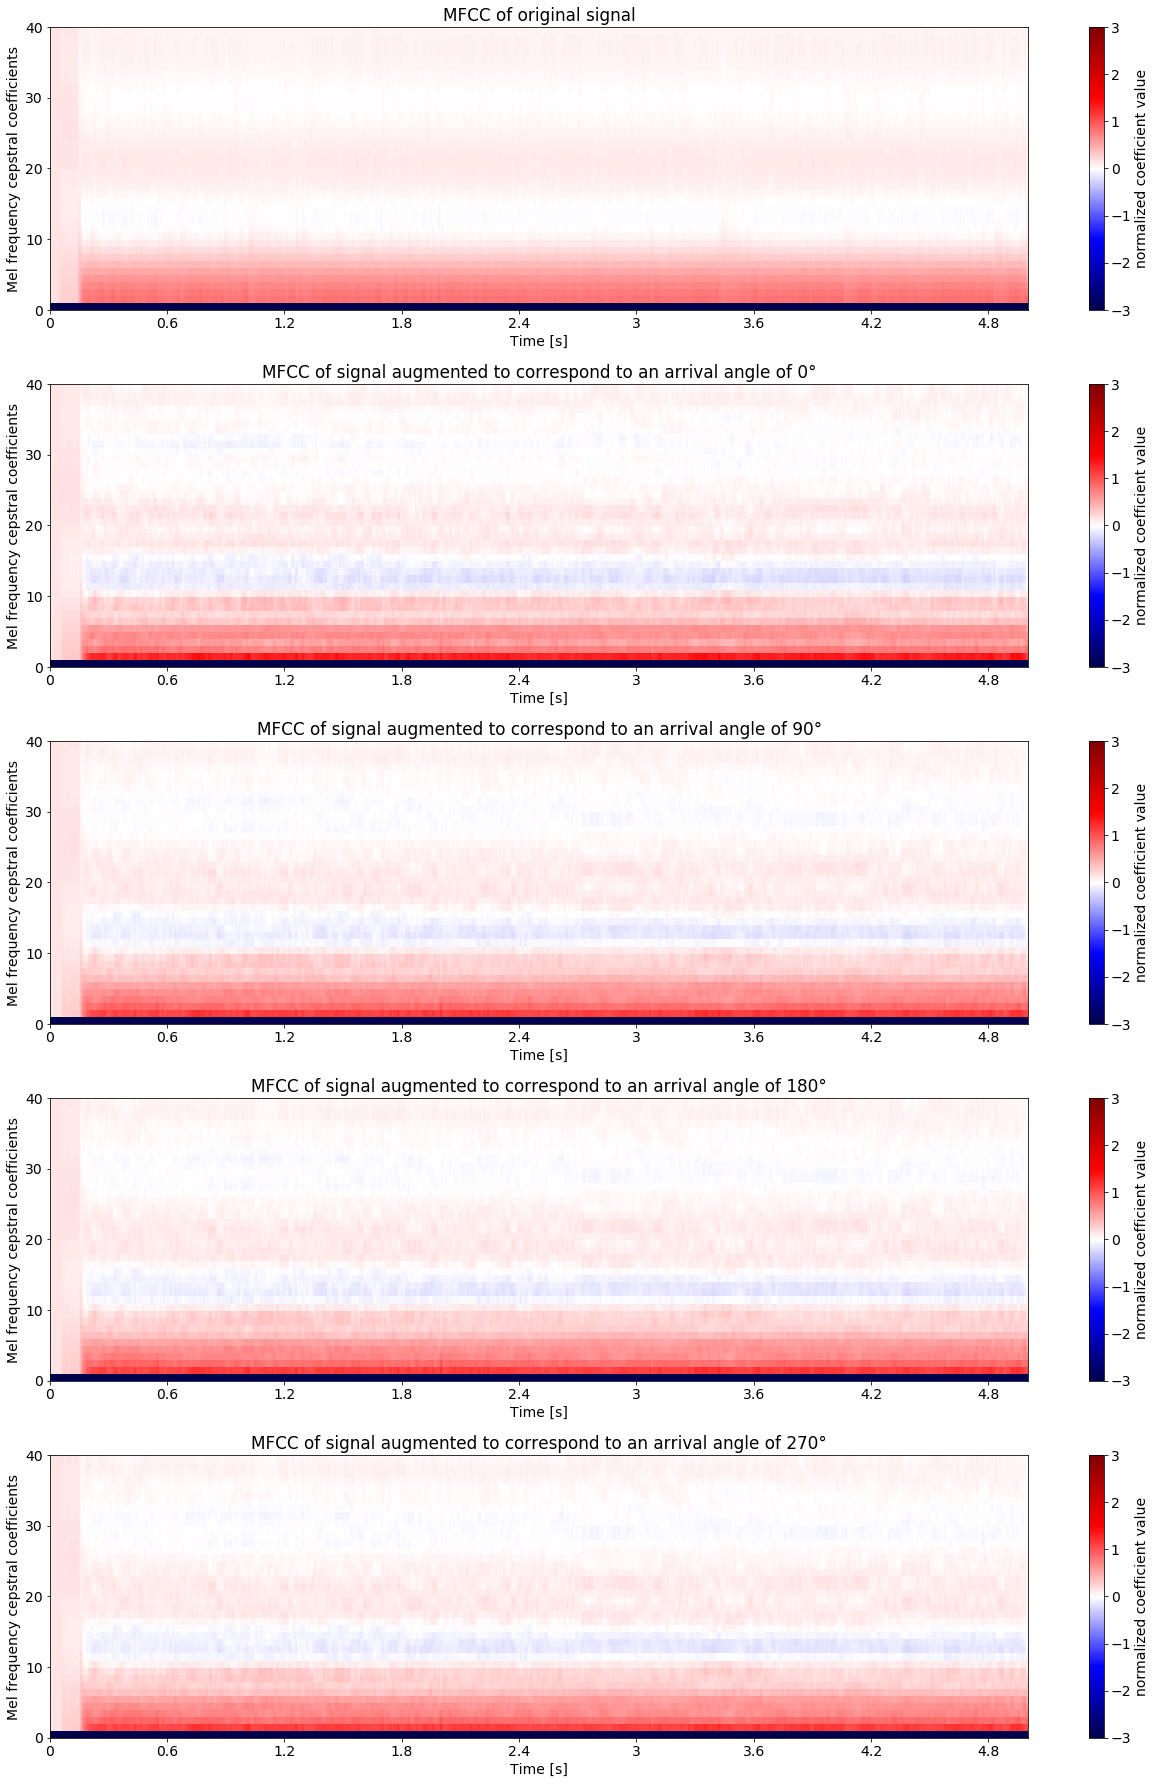

In [19]:
c_min = -3
c_max = 3
plt.subplots(5,1,figsize=(18, 25),sharey=True)
plt.subplot(5,1,1)
librosa.display.specshow(mfcc_pre, x_axis='time', sr=44100, hop_length=256,vmin=c_min,vmax=c_max, cmap='seismic')#, y_axis='mel')
plt.colorbar().set_label('normalized coefficient value')
# cbar.set_label('MFCCs')
plt.title('MFCC of original signal')
plt.xlabel('Time [s]')
plt.ylabel('Mel frequency cepstral coefficients')
plt.yticks([0,  10.,  20.,  30. , 40. ], [0, 10, 20, 30, 40])
# plt.ylabel('Mel center coefficients [Hz]')
# plt.yticks([  10.,  20.,  30. , 40. ], [ 975, 2666, 7292, 19939])
plt.tight_layout()
plt.subplot(5,1,2)
librosa.display.specshow(mfcc_post_0, x_axis='time', hop_length=256, sr=44100,vmin=c_min,vmax=c_max, cmap='seismic')#, y_axis='mel')
plt.colorbar().set_label('normalized coefficient value')
plt.title('MFCC of signal augmented to correspond to an arrival angle of 0°')
plt.xlabel('Time [s]')
plt.ylabel('Mel frequency cepstral coefficients')
plt.yticks([0,  10.,  20.,  30. , 40. ], [0, 10, 20, 30, 40])
# plt.ylabel('Mel center coefficients [Hz]')
# plt.yticks([  10.,  20.,  30. , 40. ], [ 975, 2666, 7292, 19939])
plt.tight_layout()
plt.subplot(5,1,3)
librosa.display.specshow(mfcc_post_90, x_axis='time', hop_length=256, sr=44100,vmin=c_min,vmax=c_max, cmap='seismic')#, y_axis='mel')
plt.colorbar().set_label('normalized coefficient value')
plt.title('MFCC of signal augmented to correspond to an arrival angle of 90°')
plt.xlabel('Time [s]')
plt.ylabel('Mel frequency cepstral coefficients')
plt.yticks([0,  10.,  20.,  30. , 40. ], [0, 10, 20, 30, 40])
# plt.ylabel('Mel center coefficients [Hz]')
# plt.yticks([  10.,  20.,  30. , 40. ], [ 975, 2666, 7292, 19939])
plt.tight_layout()
plt.subplot(5,1,4)
librosa.display.specshow(mfcc_post_180, x_axis='time', hop_length=256, sr=44100,vmin=c_min,vmax=c_max, cmap='seismic')#, y_axis='mel')
plt.colorbar().set_label('normalized coefficient value')
plt.title('MFCC of signal augmented to correspond to an arrival angle of 180°')
plt.xlabel('Time [s]')
plt.ylabel('Mel frequency cepstral coefficients')
plt.yticks([0,  10.,  20.,  30. , 40. ], [0, 10, 20, 30, 40])
# plt.ylabel('Mel center coefficients [Hz]')
# plt.yticks([  10.,  20.,  30. , 40. ], [ 975, 2666, 7292, 19939])
plt.tight_layout()
plt.subplot(5,1,5)
librosa.display.specshow(mfcc_post_270, x_axis='time', hop_length=256, sr=44100,vmin=c_min,vmax=c_max, cmap='seismic')#, y_axis='mel')
plt.colorbar().set_label('normalized coefficient value')
plt.title('MFCC of signal augmented to correspond to an arrival angle of 270°')
plt.xlabel('Time [s]')
plt.ylabel('Mel frequency cepstral coefficients')
plt.yticks([0,  10.,  20.,  30. , 40. ], [0, 10, 20, 30, 40])
# plt.ylabel('Mel center coefficients [Hz]')
# plt.yticks([  10.,  20.,  30. , 40. ], [ 975, 2666, 7292, 19939])
plt.tight_layout()

plt.savefig(f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{"r_" if isReverse else ""}mfcc_specs_diff_dir_seismic.png')
plt.show()

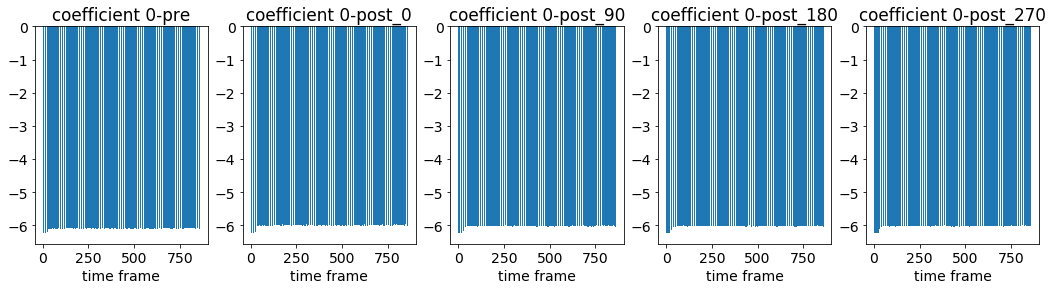

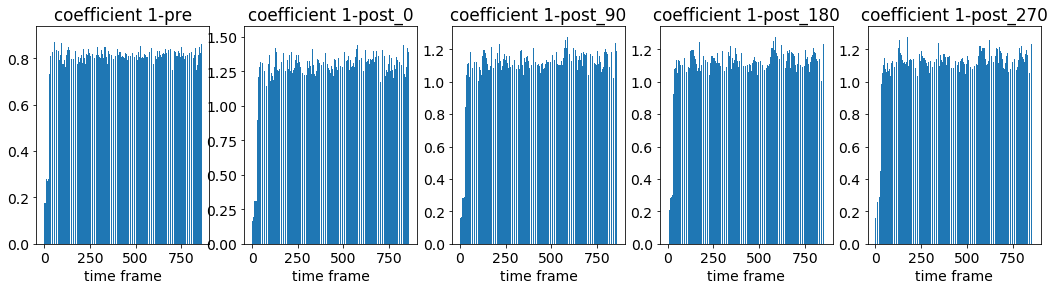

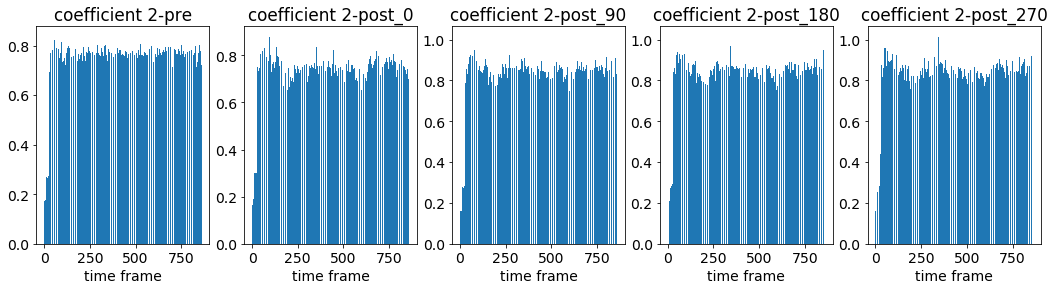

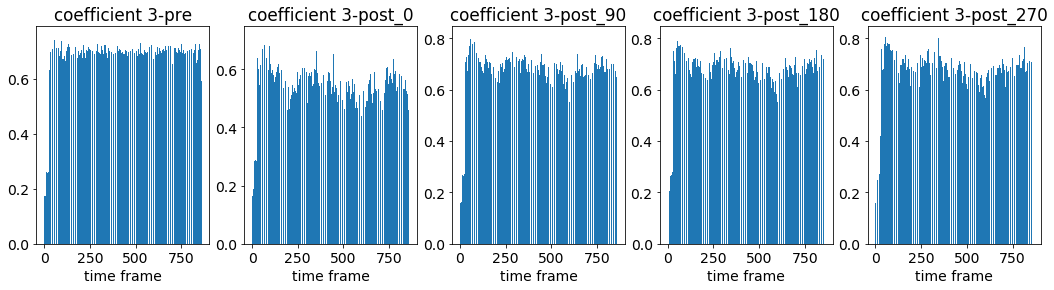

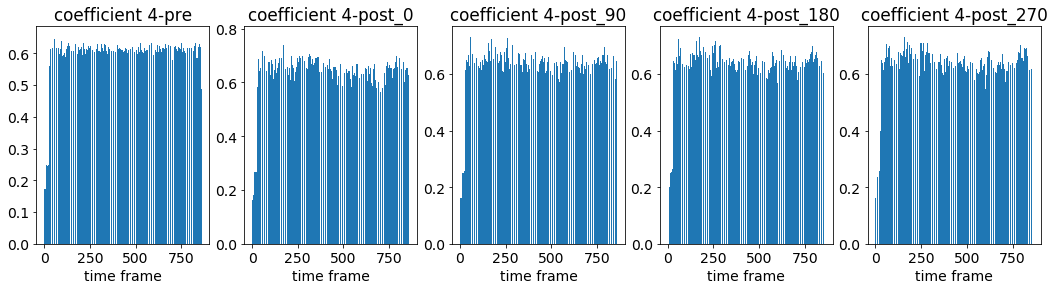

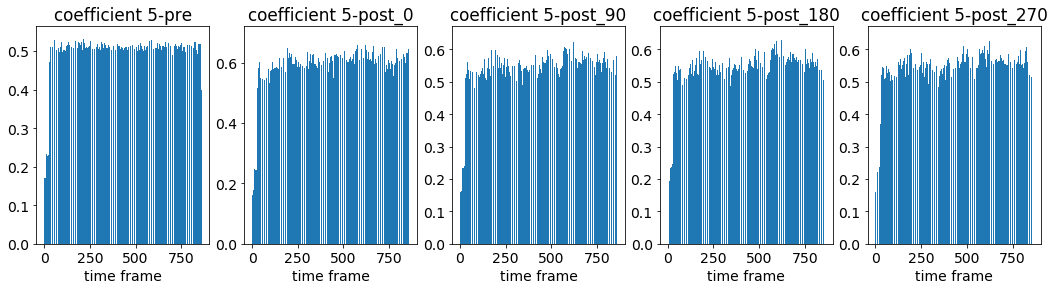

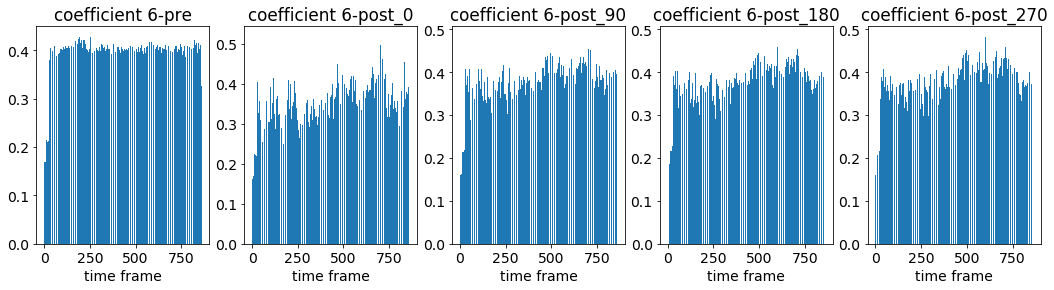

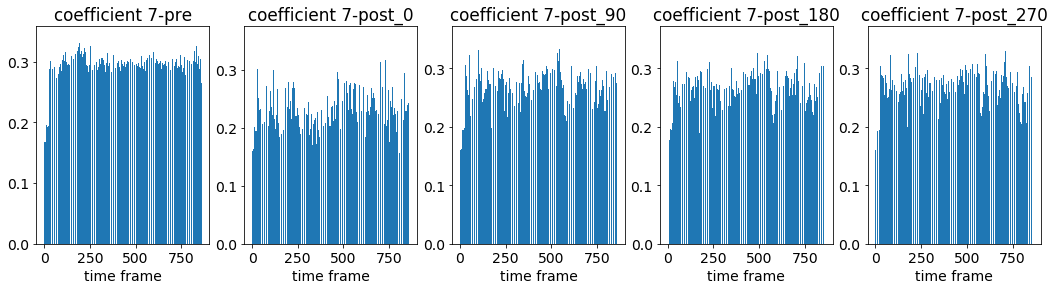

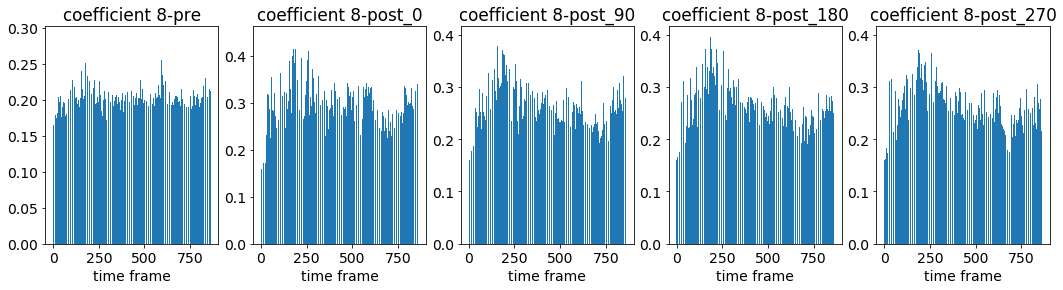

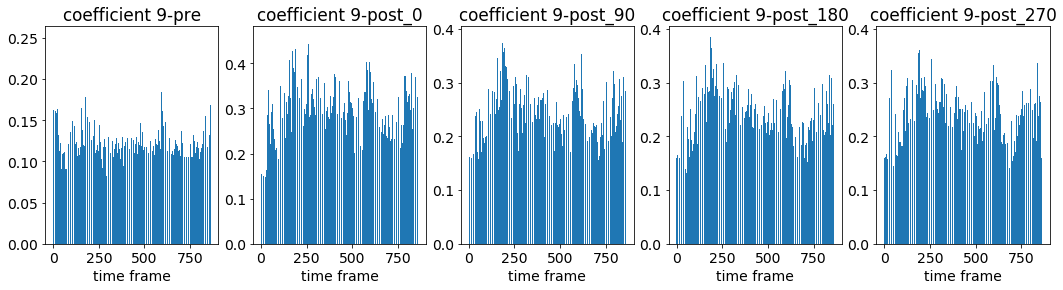

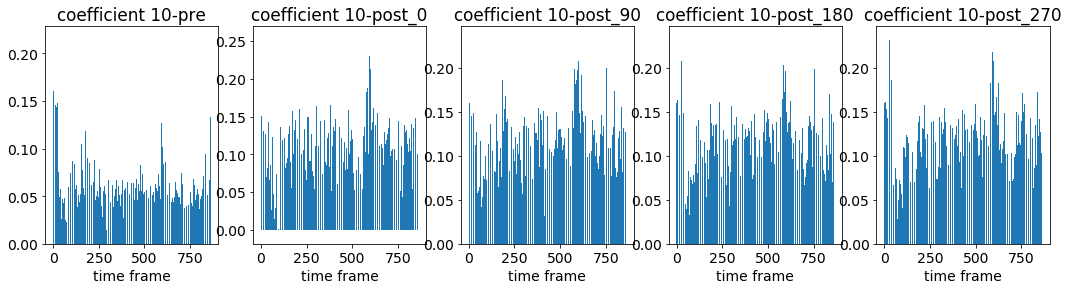

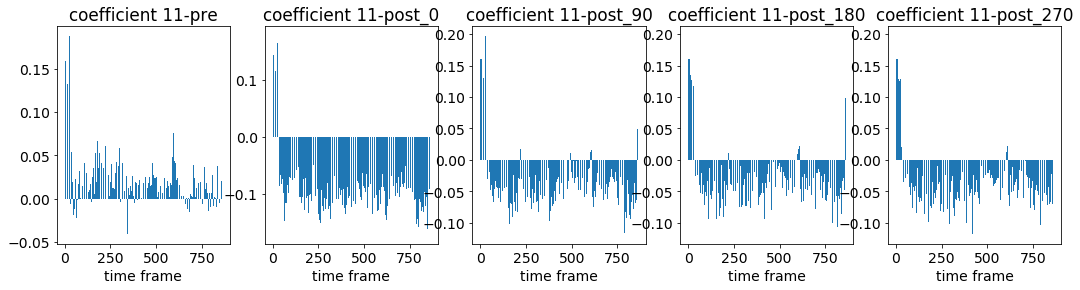

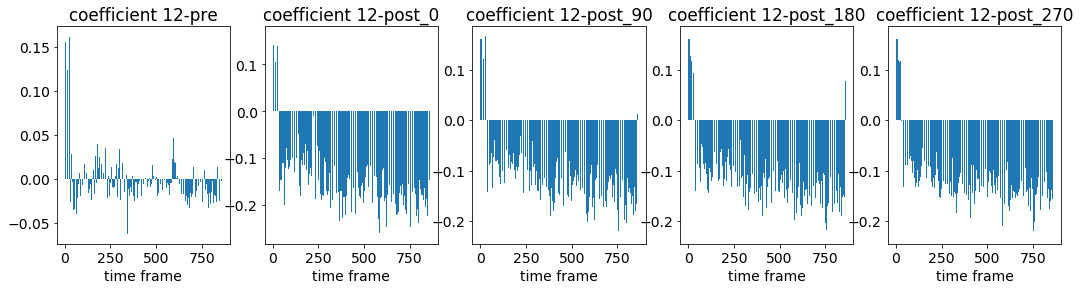

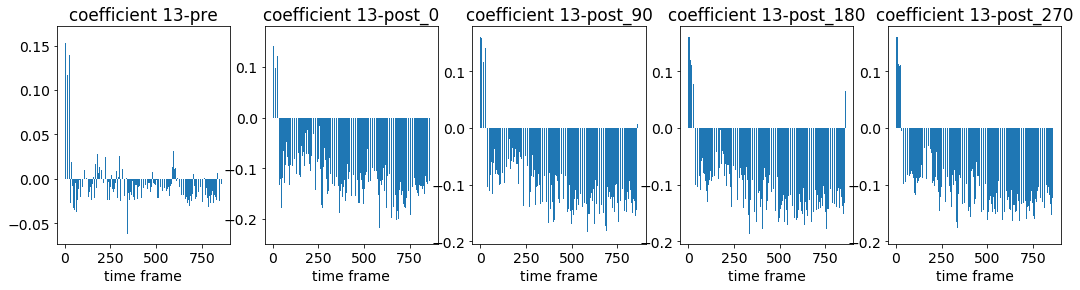

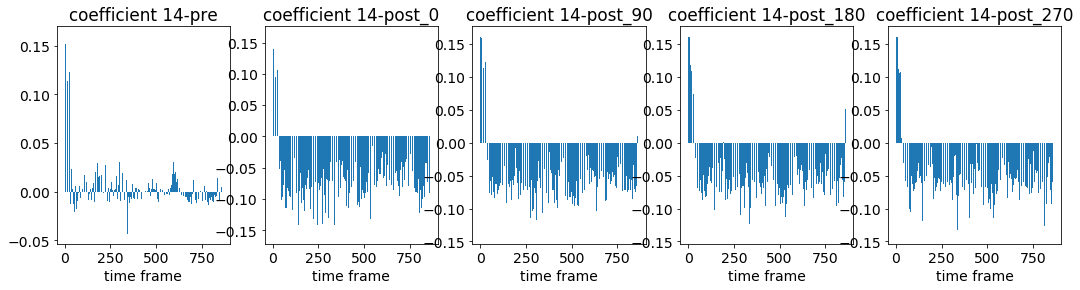

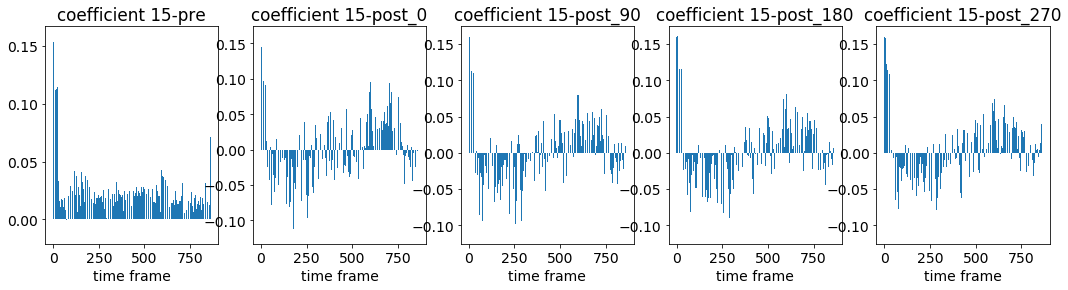

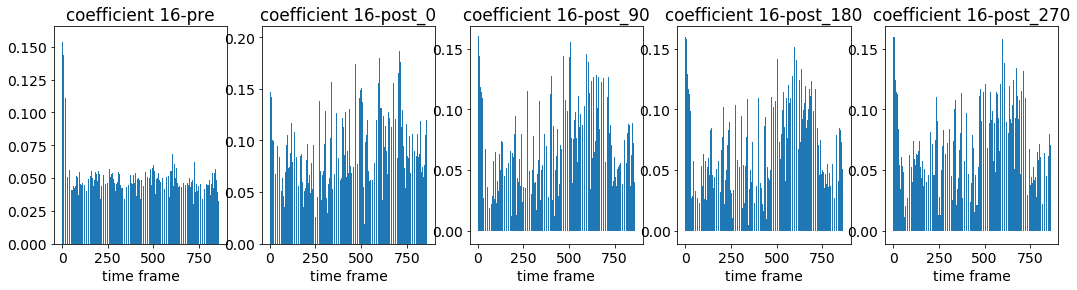

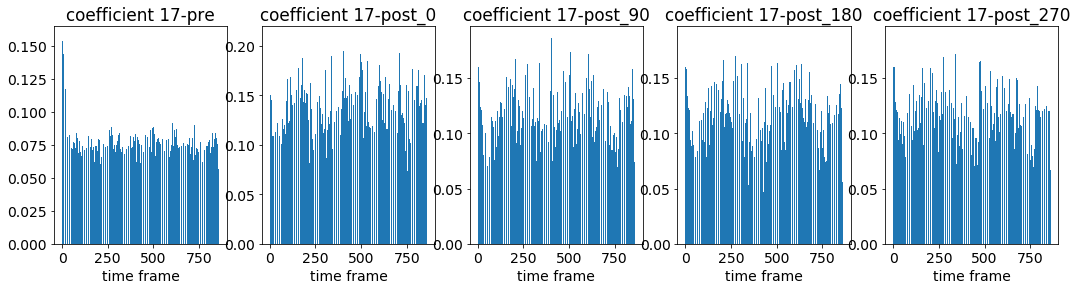

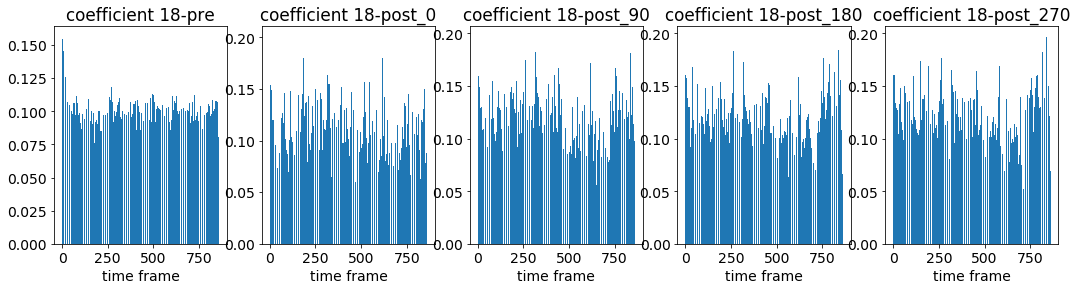

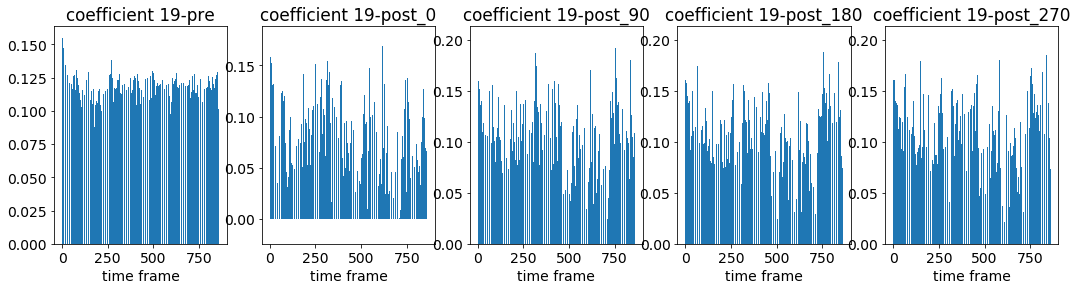

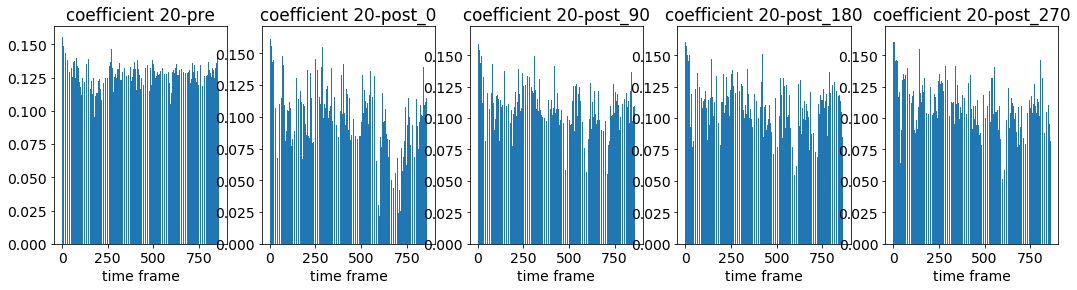

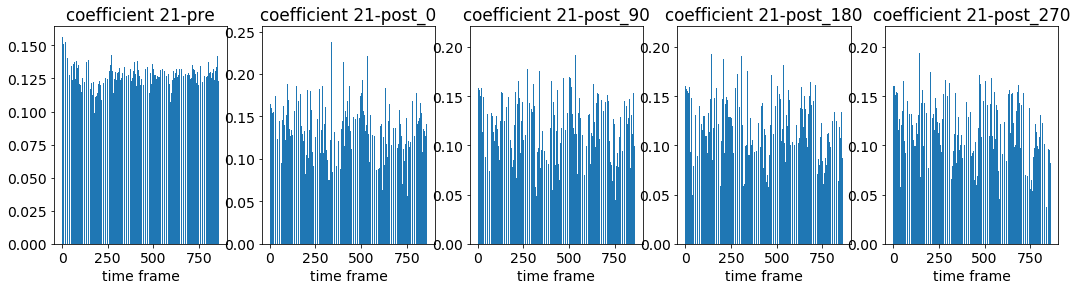

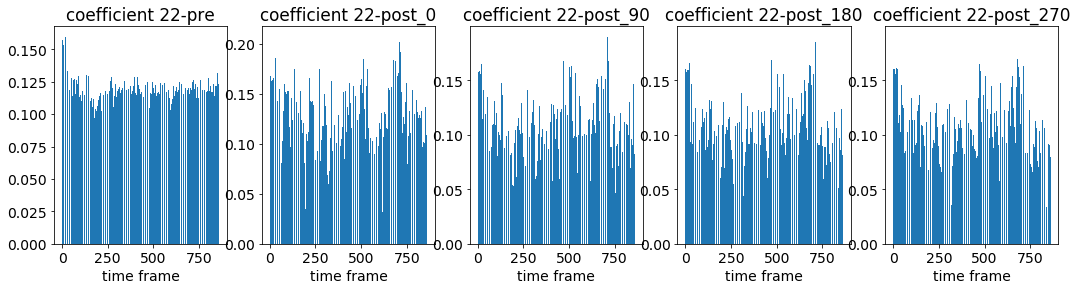

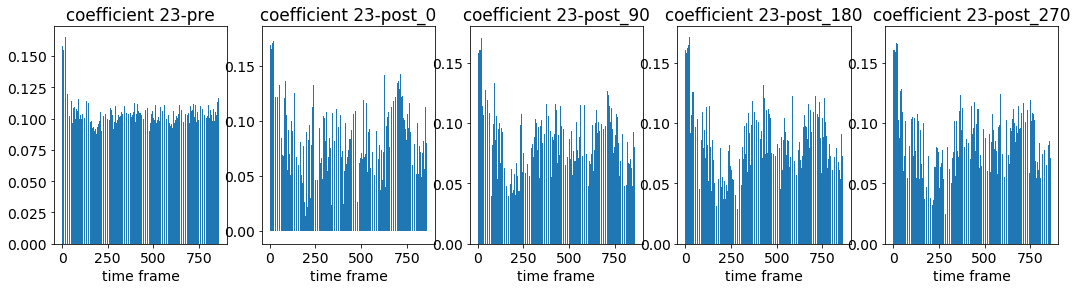

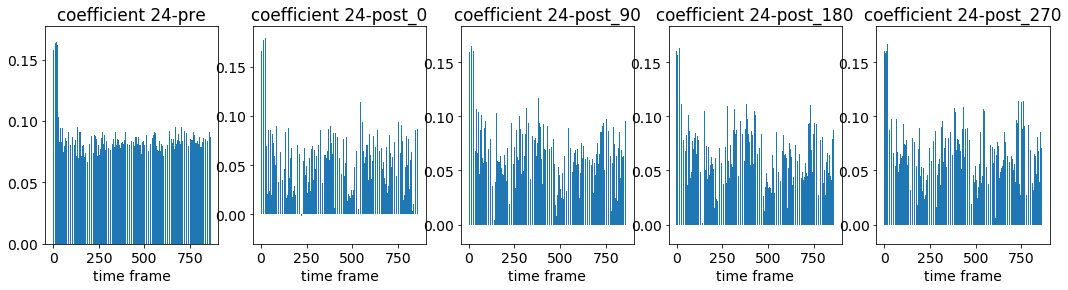

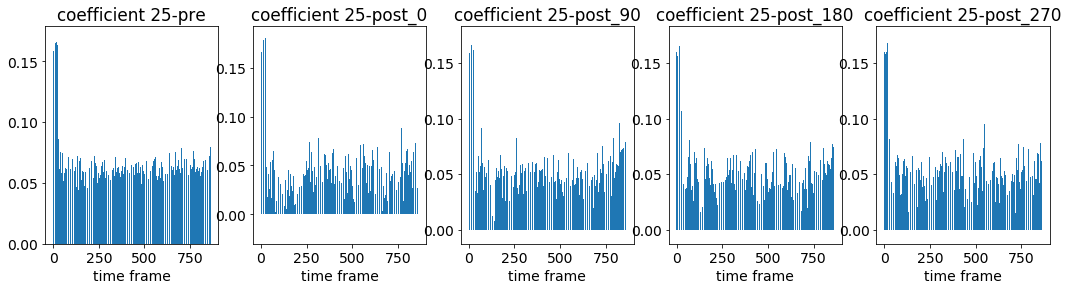

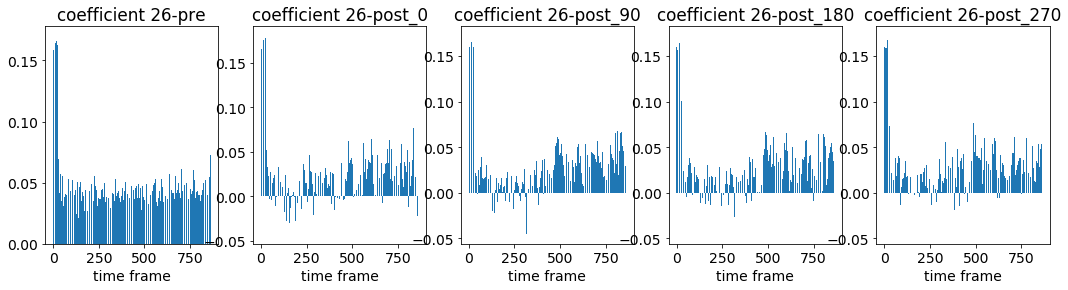

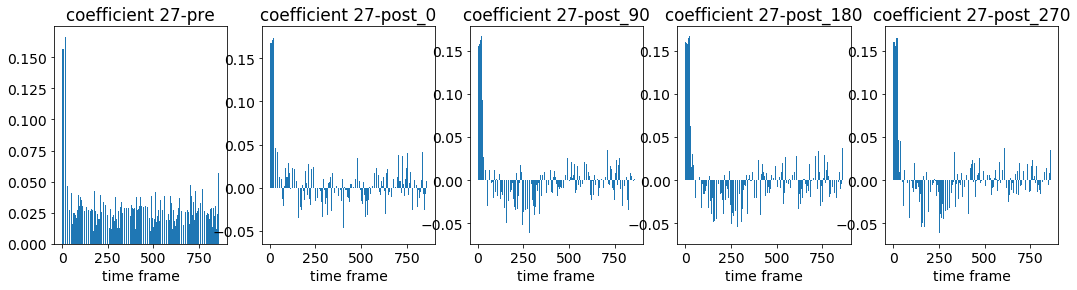

KeyboardInterrupt: 

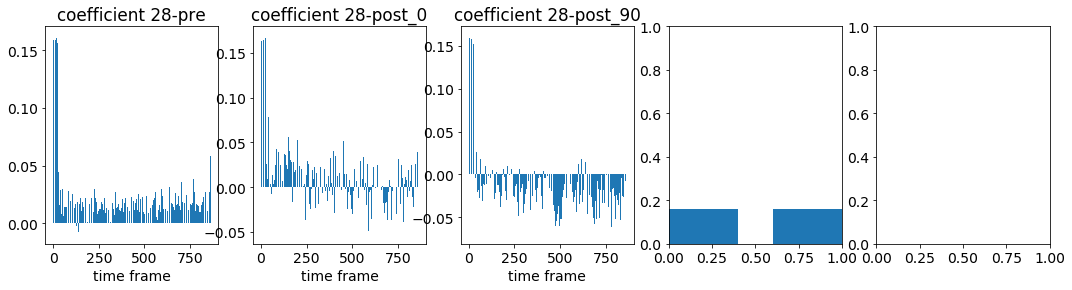

In [33]:
for coef in range(0,40):
    fig, ax = plt.subplots(1, 5,figsize=(18, 4))
    ax[0].bar(np.arange(len(mfcc_pre[coef,:])),mfcc_pre[coef,:], align='center', alpha=1)
    ax[0].set_xlabel('time frame')
    ax[0].set_title(f'coefficient {coef}-pre')
    ax[1].bar(np.arange(len(mfcc_post_0[coef,:])),mfcc_post_0[coef,:], align='center', alpha=1)
    ax[1].set_xlabel('time frame')
    ax[1].set_title(f'coefficient {coef}-post_0')
    ax[2].bar(np.arange(len(mfcc_post_90[coef,:])),mfcc_post_90[coef,:], align='center', alpha=1)
    ax[2].set_xlabel('time frame')
    ax[2].set_title(f'coefficient {coef}-post_90')
    ax[3].bar(np.arange(len(mfcc_post_180[coef,:])),mfcc_post_180[coef,:], align='center', alpha=1)
    ax[3].set_xlabel('time frame')
    ax[3].set_title(f'coefficient {coef}-post_180')
    ax[4].bar(np.arange(len(mfcc_post_270[coef,:])),mfcc_post_270[coef,:], align='center', alpha=1)
    ax[4].set_xlabel('time frame')
    ax[4].set_title(f'coefficient {coef}-post_270')
    plt.show()

In [1]:
coef = 4
plt.figure(figsize=(18, 4.2),dpi=120)
plt.subplot(1,5,1)
plt.bar(np.arange(len(mfcc_pre[coef,:])),mfcc_pre[coef,:], align='center', alpha=1)
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
plt.title(f'coefficient {coef}, original')
plt.ylabel('standardized coefficient value')
plt.subplot(1,5,2)
plt.bar(np.arange(len(mfcc_post_0[coef,:])),mfcc_post_0[coef,:], align='center', alpha=1)
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
plt.yticks([])
plt.title(f'coefficient {coef}, 0°')
plt.subplot(1,5,3)
plt.bar(np.arange(len(mfcc_post_90[coef,:])),mfcc_post_90[coef,:], align='center', alpha=1)
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
plt.yticks([])
plt.title(f'coefficient {coef}, 90°')
plt.subplot(1,5,4)
plt.bar(np.arange(len(mfcc_post_180[coef,:])),mfcc_post_180[coef,:], align='center', alpha=1)
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
plt.yticks([])
plt.title(f'coefficient {coef}, 180°')
plt.subplot(1,5,5)
plt.bar(np.arange(len(mfcc_post_270[coef,:])),mfcc_post_270[coef,:], align='center', alpha=1)
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
plt.yticks([])
plt.title(f'coefficient {coef}, 270°')
plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/coef_diff_dir.png')
plt.show()

NameError: name 'plt' is not defined

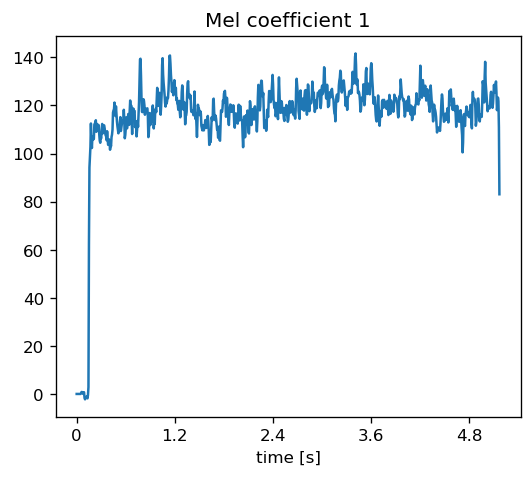

In [42]:
#MEL COEFFICIENT
coef = 1
plt.figure(figsize=(5, 4.2),dpi=120)
plt.plot(mfcc_pre[1,:])
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
# plt.ylabel('value')
plt.title(f'Mel coefficient {coef}')
# plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/example_used_coef.png')

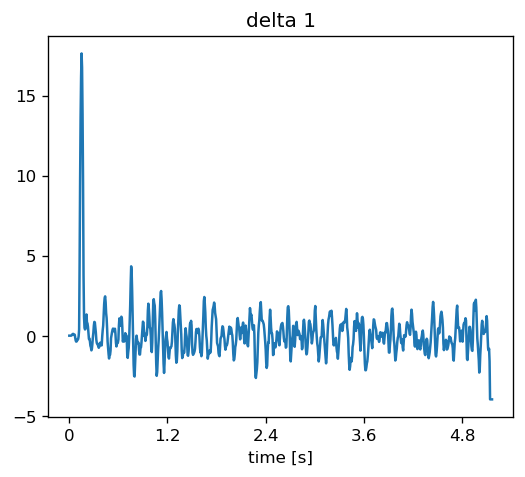

In [43]:
#DELTA
coef = 1
plt.figure(figsize=(5, 4.2),dpi=120)
plt.plot(delta_pre[1,:])
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
# plt.ylabel('value')
plt.title(f'delta {coef}')
# plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/example_used_delta.png')

Text(0.5, 1.0, 'delta 1')

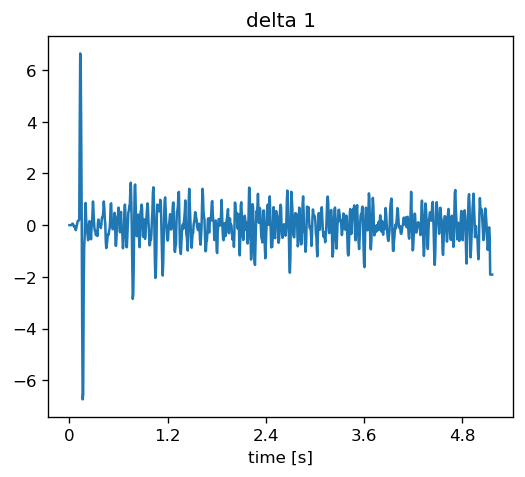

In [45]:
#DELTA-DELTQ
coef = 1
plt.figure(figsize=(5, 4.2),dpi=120)
plt.plot(deltaDelta_pre[1,:])
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
# plt.ylabel('value')
plt.title(f'delta-delta {coef}')
# plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/example_used_delta.png')

In [ ]:
plt.plot(mfcc_pre[1,:])

In [ ]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40)
plt.figure(figsize=(18, 9))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, y_axis='mel', sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()

Text(0.5, 1.0, 'Mel filter bank')

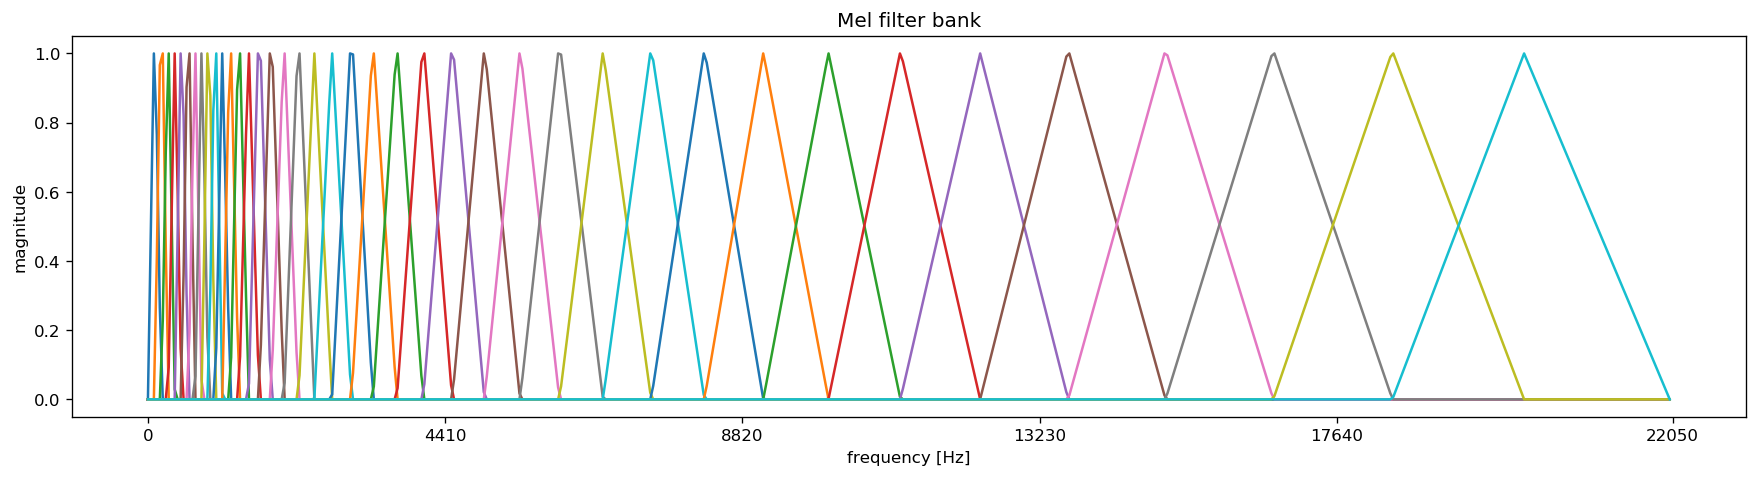

In [46]:
sr = 44100
mel_basis = librosa.filters.mel(sr=sr, n_fft=1024, n_mels=40,fmin=0, fmax=sr / 2)
mel_basis /= np.max(mel_basis, axis=-1)[:, None]
plt.figure(figsize=(18, 4.2),dpi=120)
plt.plot(mel_basis.T)
plt.xticks([  0.,  100.,  200. , 300. , 400.  ,513. ], [0, 4410, 8820, 13230, 17640, 22050])
plt.xlabel('frequency [Hz]')
plt.ylabel('magnitude')
plt.title('Mel filter bank')

In [ ]:
exponential_chirp = librosa.chirp(1, 22050, duration=5,sr=sr)
#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
mfccR = librosa2.feature.reverse_mfcc(y=exponential_chirp, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
mfcc = librosa.feature.mfcc(y=exponential_chirp, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)

In [ ]:
plt.figure(figsize=(18, 9))
D = librosa.amplitude_to_db(np.abs(librosa.stft(exponential_chirp)), ref=np.max)
librosa.display.specshow(D, y_axis='linear', sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [ ]:
plt.figure(figsize=(18, 9))
librosa.display.specshow(mfcc, x_axis='time', hop_length=256, sr=44100)#, y_axis='mel')
plt.colorbar().set_label('standardized coefficient value')
plt.title('MFCC of signal augmented to correspond to an arrival angle of 270°')
plt.xlabel('Time [s]')
plt.ylabel('Mel frequency cepstral coefficients')
plt.yticks([0,  10.,  20.,  30. , 40. ], [0, 10, 20, 30, 40])
plt.tight_layout()

In [ ]:
plt.figure(figsize=(18, 9))
librosa.display.specshow(mfccR, x_axis='time', hop_length=256, sr=44100)#, y_axis='mel')
plt.colorbar().set_label('standardized coefficient value')
plt.title('MFCC of signal augmented to correspond to an arrival angle of 270°')
plt.xlabel('Time [s]')
plt.ylabel('Mel frequency cepstral coefficients')
plt.yticks([0,  10.,  20.,  30. , 40. ], [0, 10, 20, 30, 40])
plt.tight_layout()

<function matplotlib.pyplot.show(*args, **kw)>

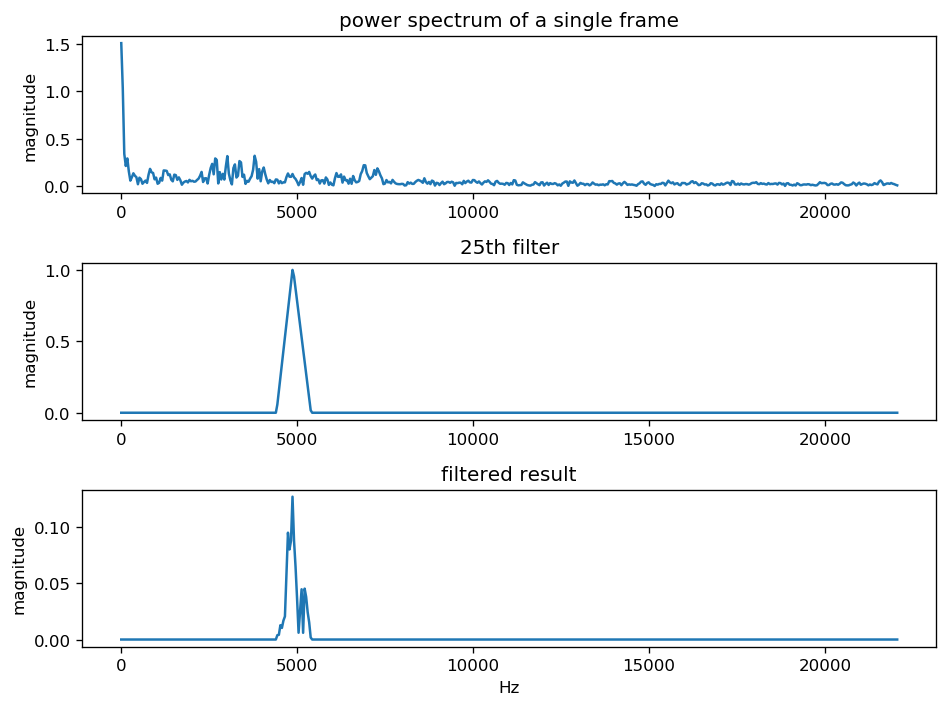

In [53]:
filter_num = 25
# for filter_num in range(0,40):
plt.figure(figsize=(8, 6),dpi=120)

plt.subplot(3,1,1)
f,t,Z = scipy.signal.stft(y,fs=44100,nperseg=1024,noverlap=768)
spec = np.abs(Z.T[1])*100000
plt.plot(f,spec);
plt.title('power spectrum of a single frame')
plt.ylabel('magnitude')

plt.subplot(3,1,2)
plt.plot(f,mel_basis[filter_num]);
# plt.xticks([  0.,  100.,  200. , 300. , 400.  ,513. ], [0, 4410, 8820, 13230, 17640, 22050])
plt.title(f'{filter_num}th filter')
plt.ylabel('magnitude')

plt.subplot(3,1,3)
melly = np.multiply(spec,mel_basis[filter_num])    
plt.plot(f,melly)
plt.title('filtered result')
plt.ylabel('magnitude')
plt.xlabel('Hz')

plt.tight_layout()
# plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/example_mel_filtering.png')
plt.show

In [ ]:
f,t,Z = scipy.signal.stft(y,fs=44100,nperseg=1024,noverlap=768)
plt.plot(f,np.abs(Z.T[1]));

In [ ]:
# plt.plot(melly);
filter_num=30
f1, Pxx_den = plt.psd(y,Fs=sr,NFFT=1024,noverlap=768);
melly = np.multiply(np.abs(Z.T[1]),mel_basis[filter_num])

In [ ]:
    # plt.plot(mel_basis.T);
    # plt.xticks([  0.,  100.,  200. , 300. , 400.  ,513. ], [0, 4410, 8820, 13230, 17640, 22050])
    # plt.xlabel('frequency [Hz]')
    # plt.ylabel('magnitude')
    # plt.title('Mel filter bank')

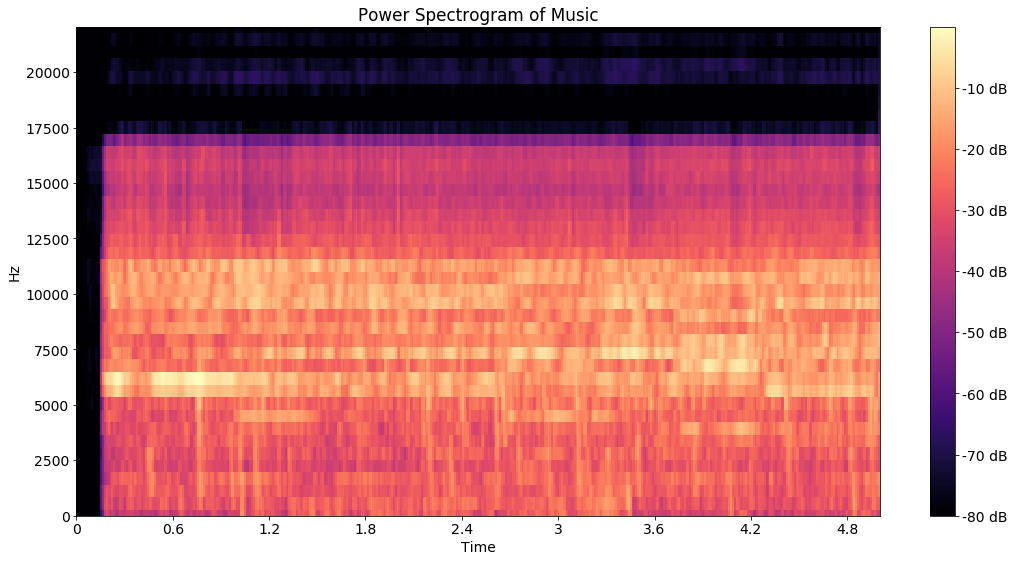

In [42]:
filename = '0_h_10_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/AUGMENTED_DATA/data6/0/{filename}.wav'
y,sr = librosa.load(audio_file, sr=44100, duration=5)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40)
plt.figure(figsize=(18, 9))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, y_axis='linear', sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Power Spectrogram of Music')
plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/music_spec.png')
plt.show()

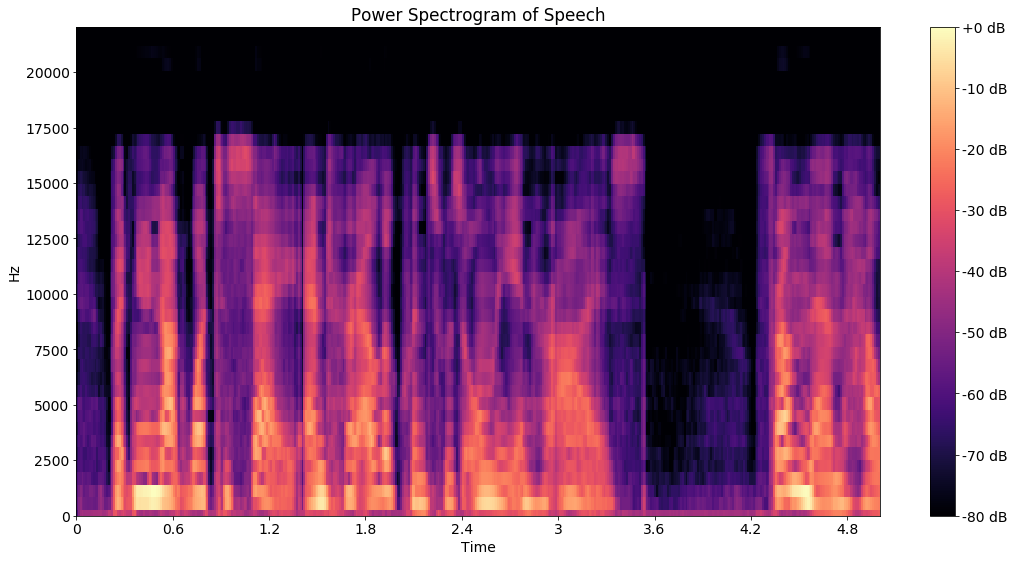

In [41]:
filename = '0_h_10_14-212-0023'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/AUGMENTED_DATA/data5/0/{filename}.wav'
d = 0
y,sr = librosa.load(audio_file, sr=44100, duration=5)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40)
plt.figure(figsize=(18, 9))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, y_axis='linear', sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Power Spectrogram of Speech')
plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/speech_spec.png')
plt.show()

In [58]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

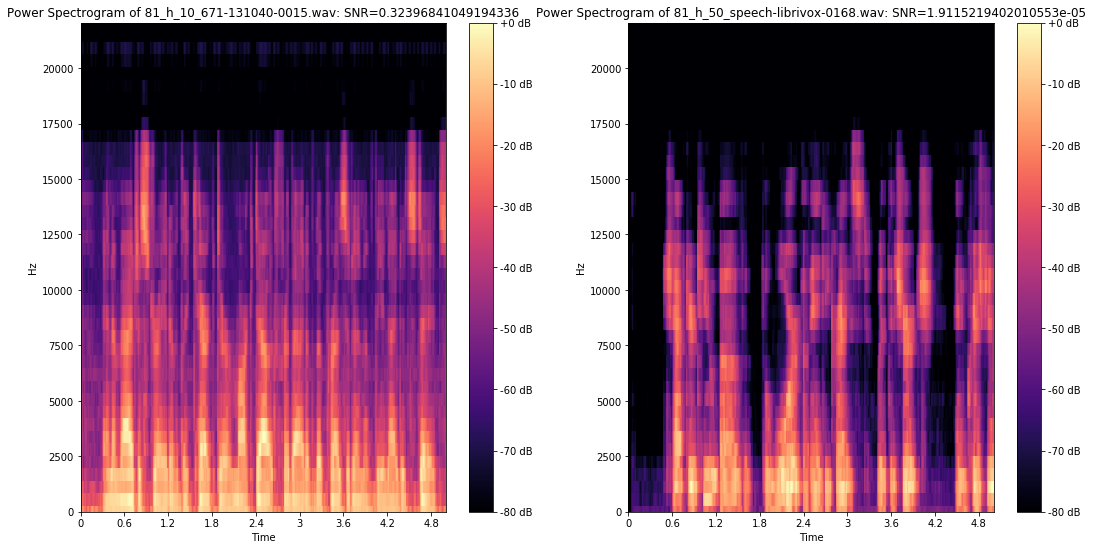

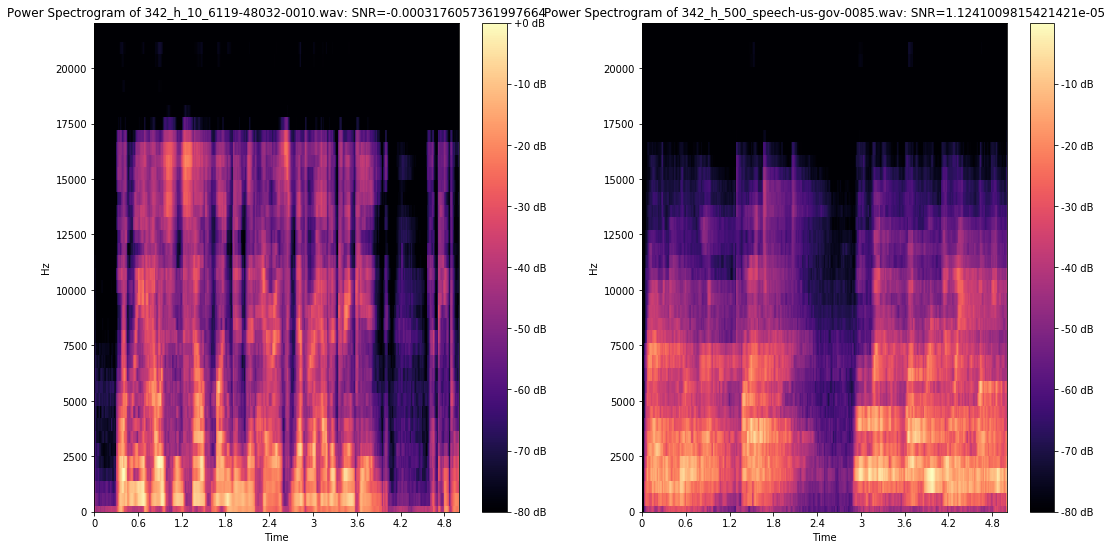

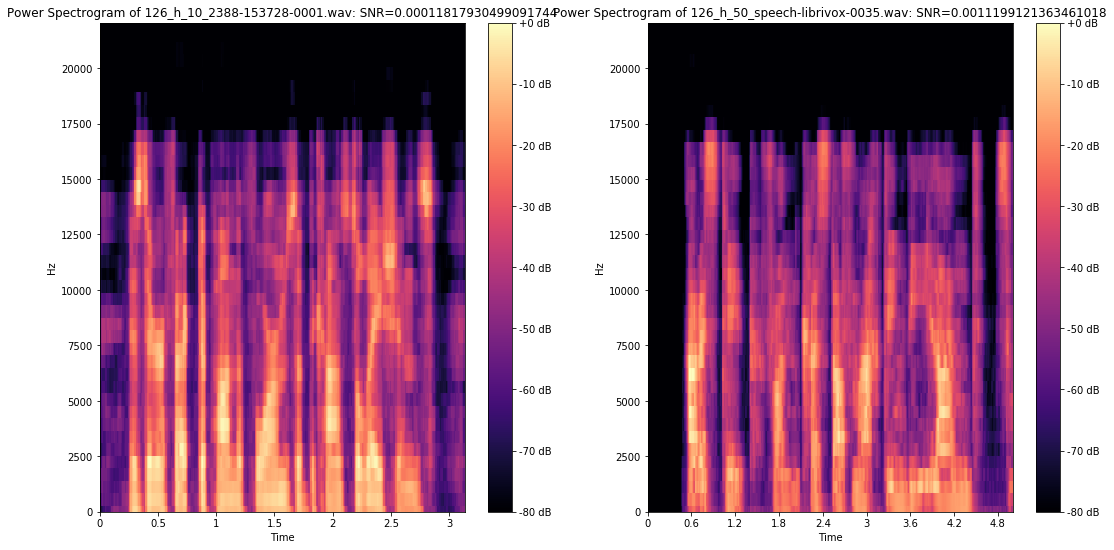

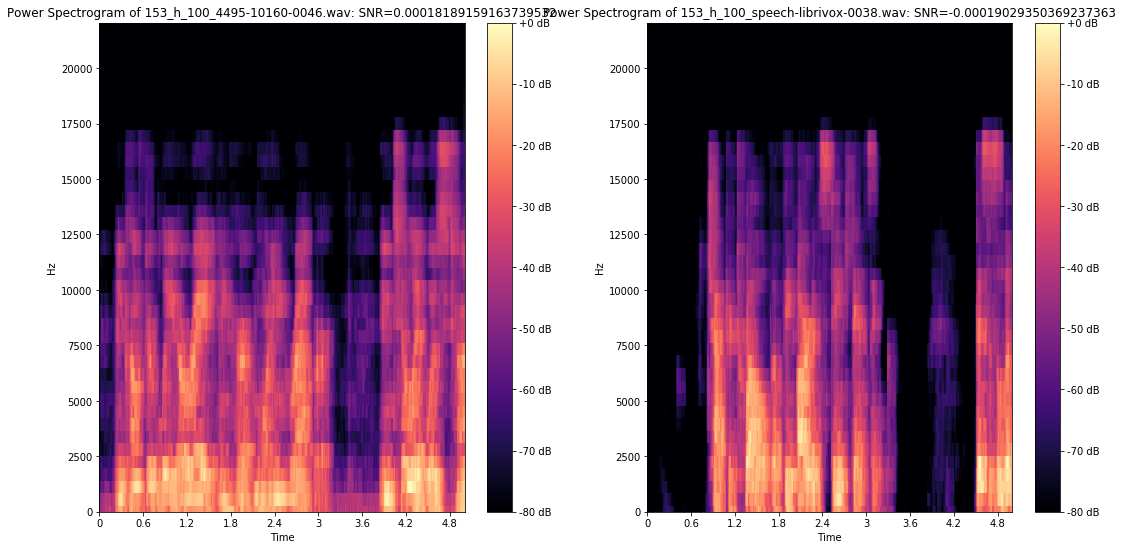

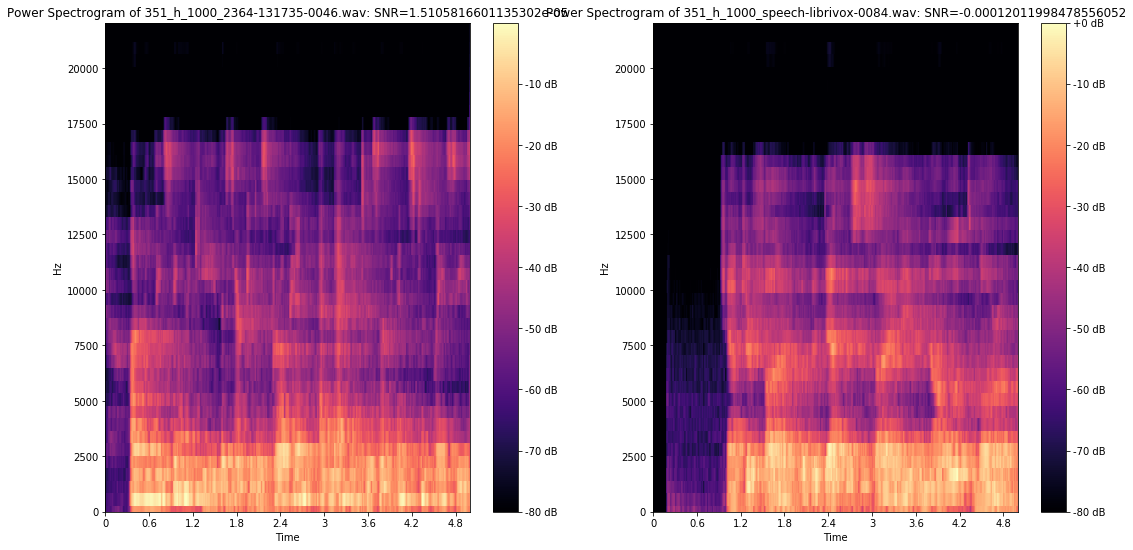

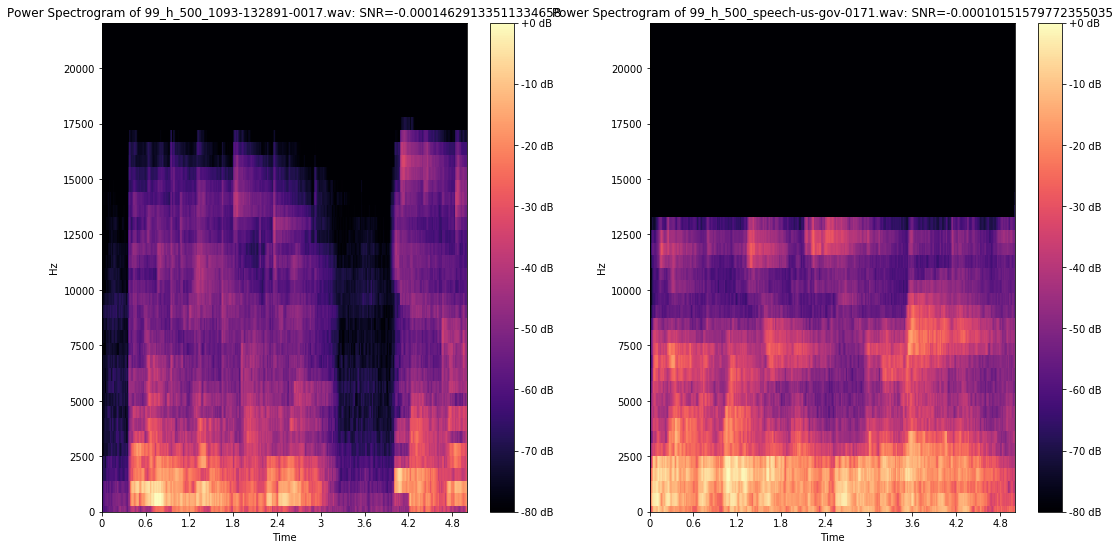

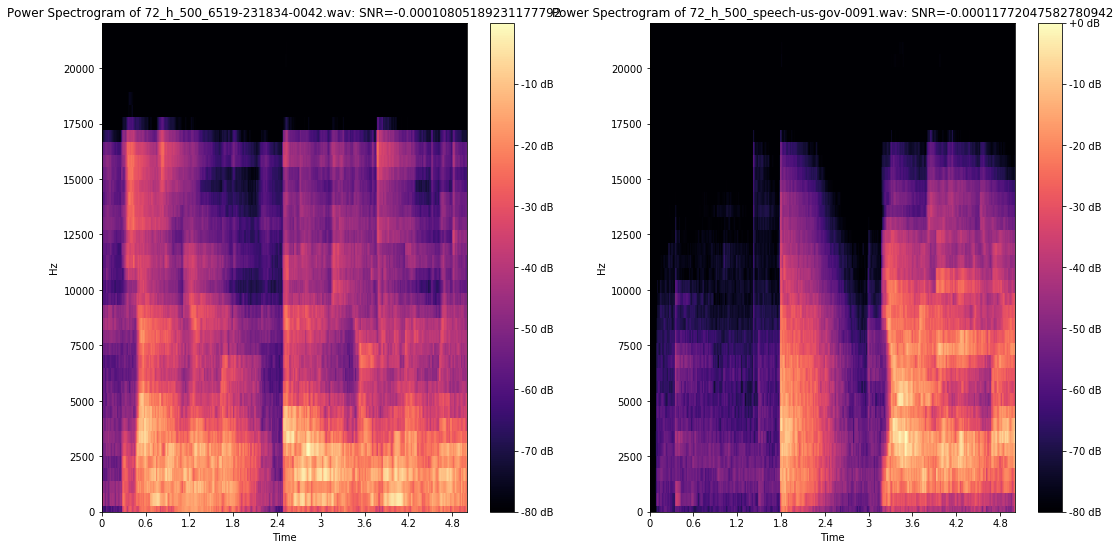

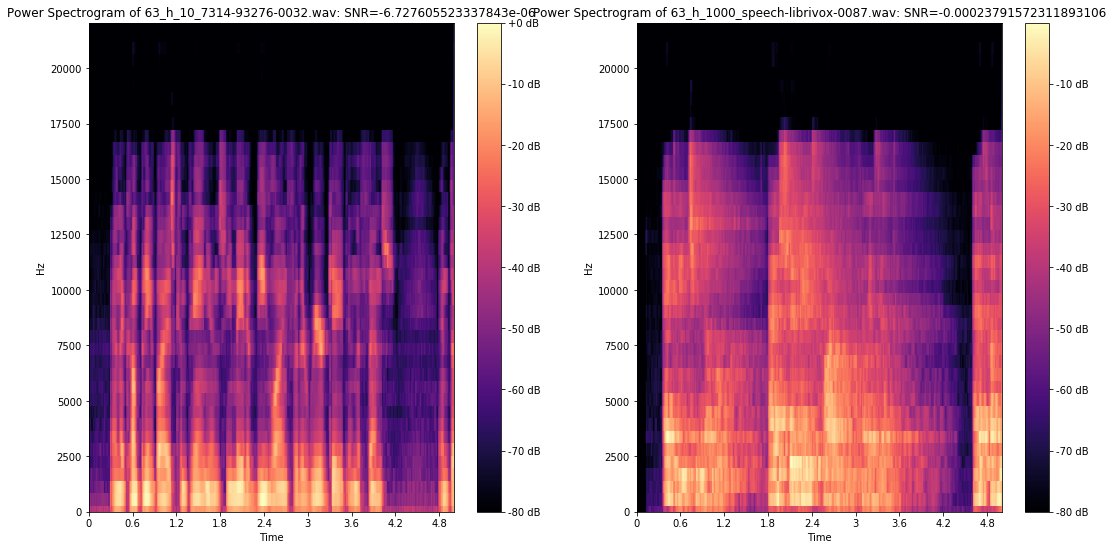

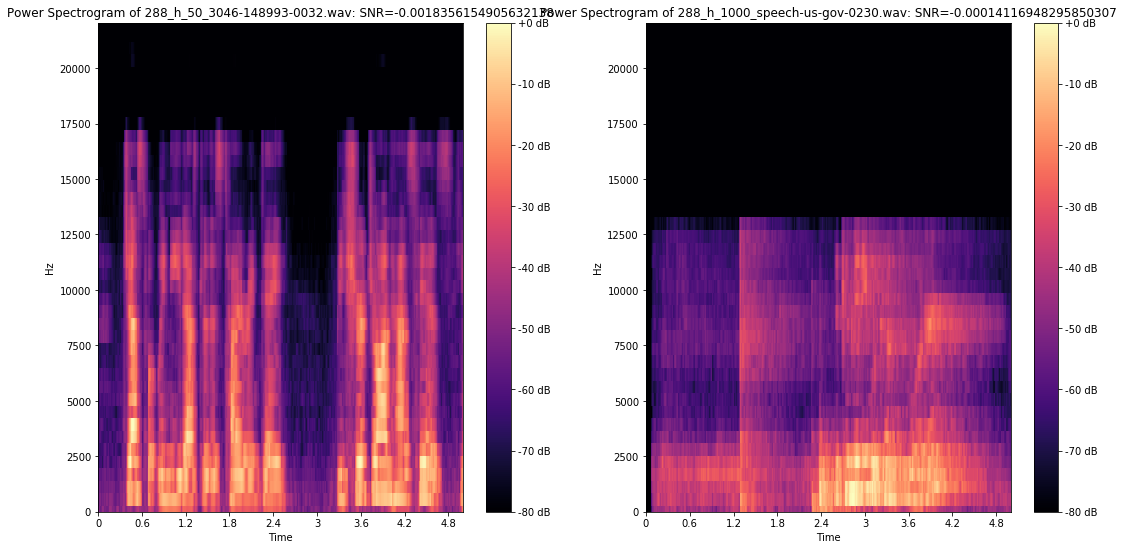

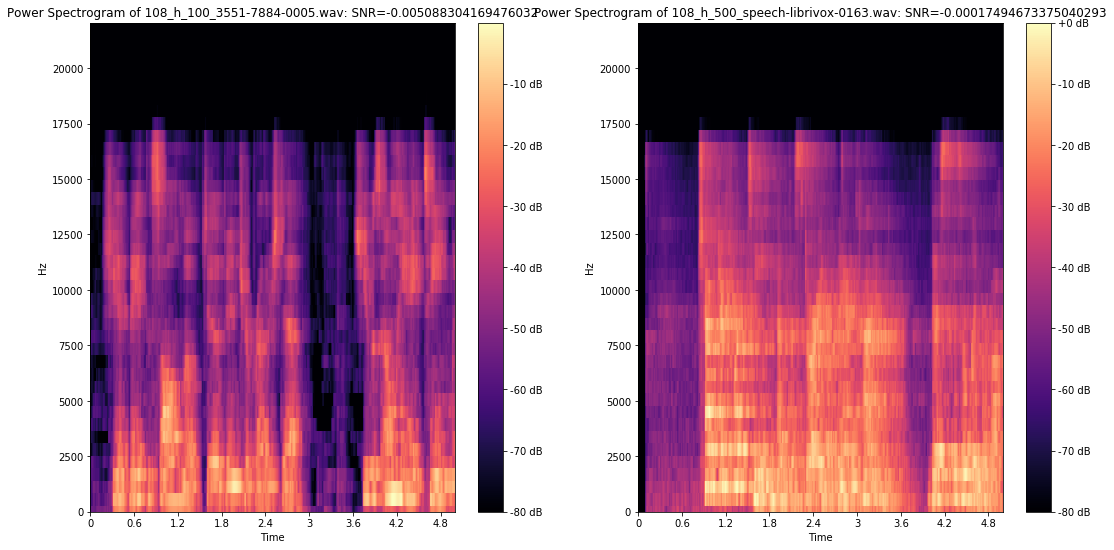

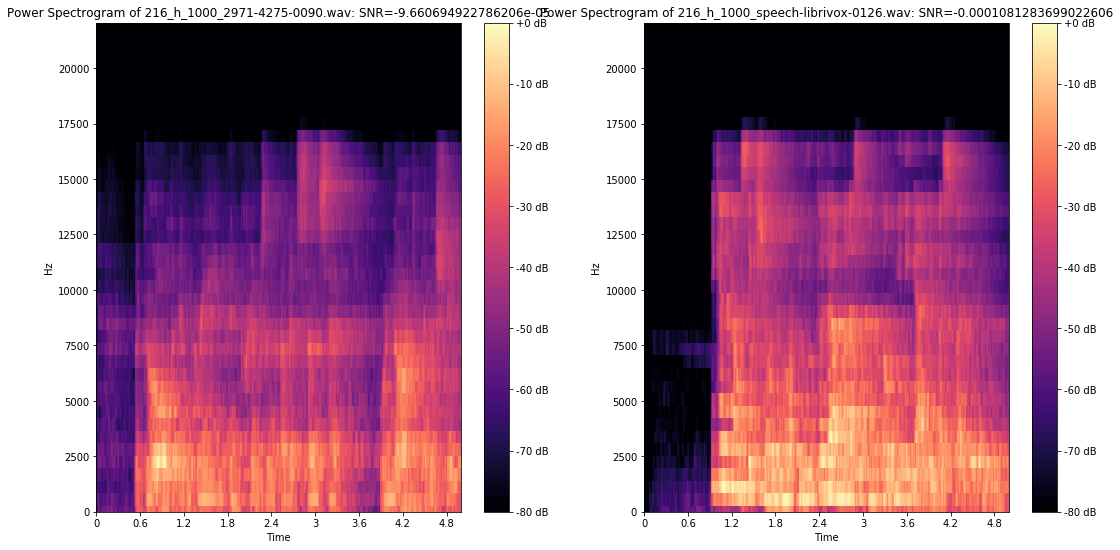

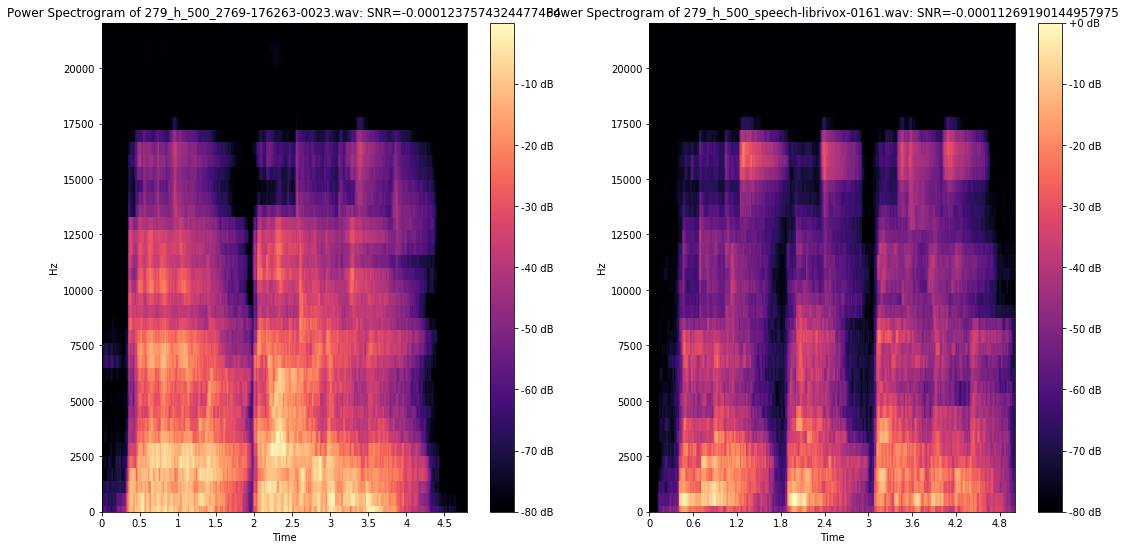

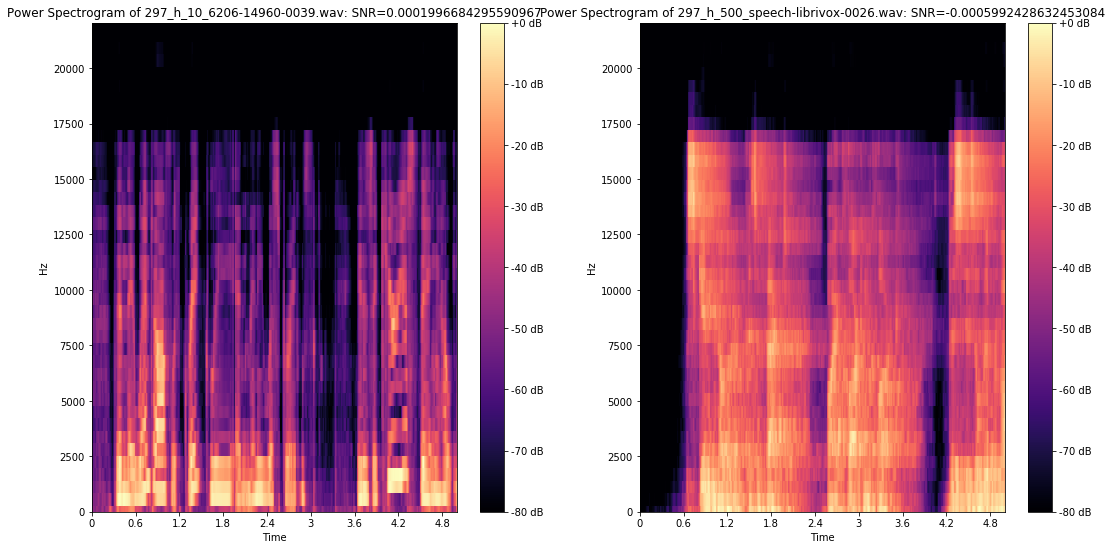

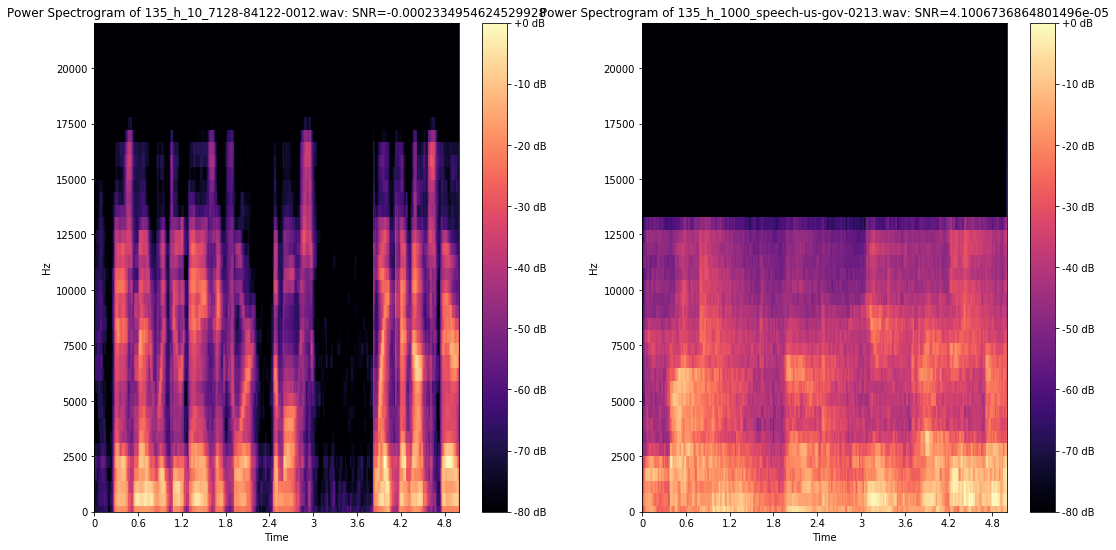

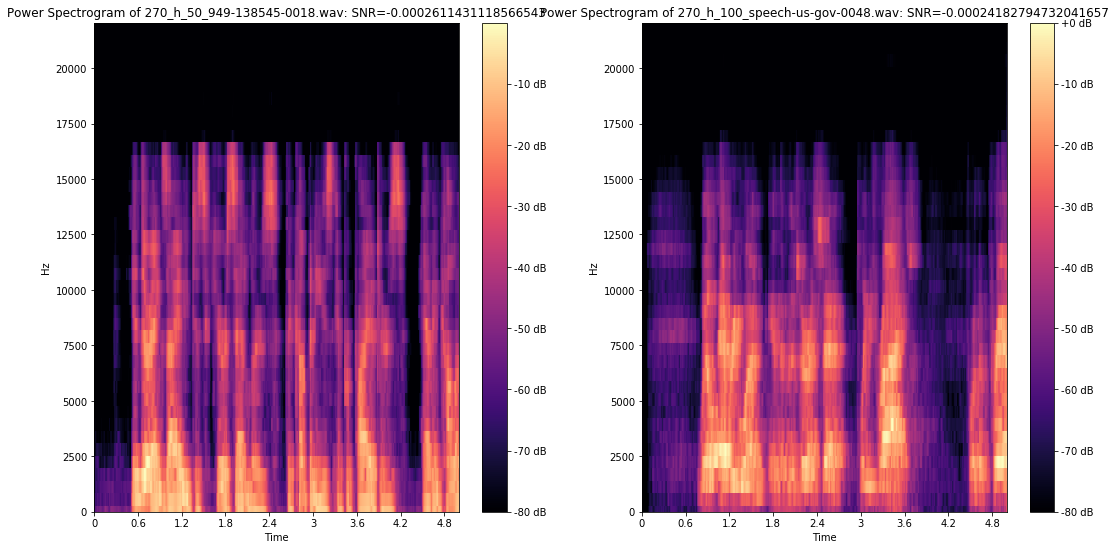

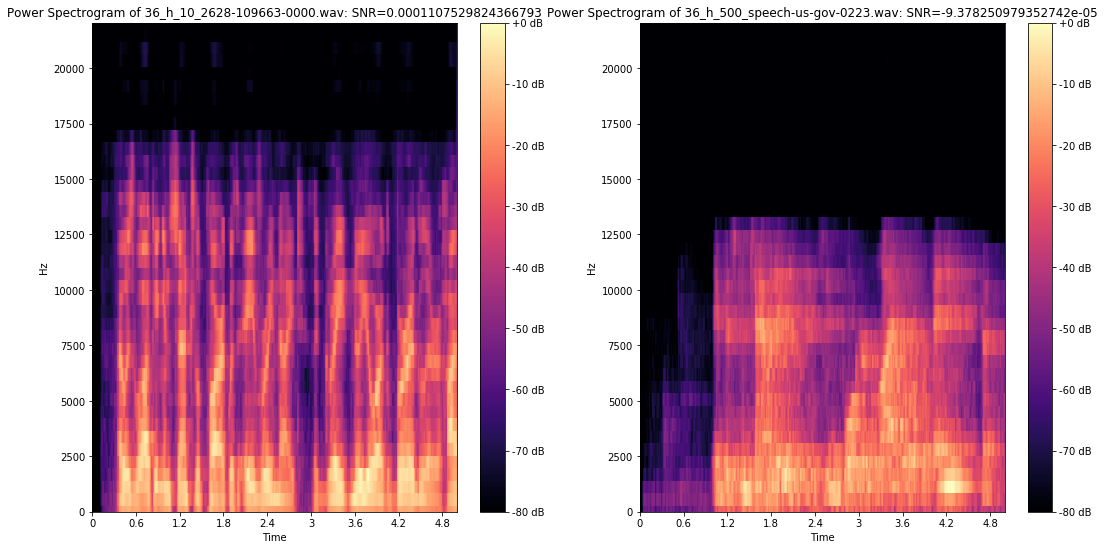

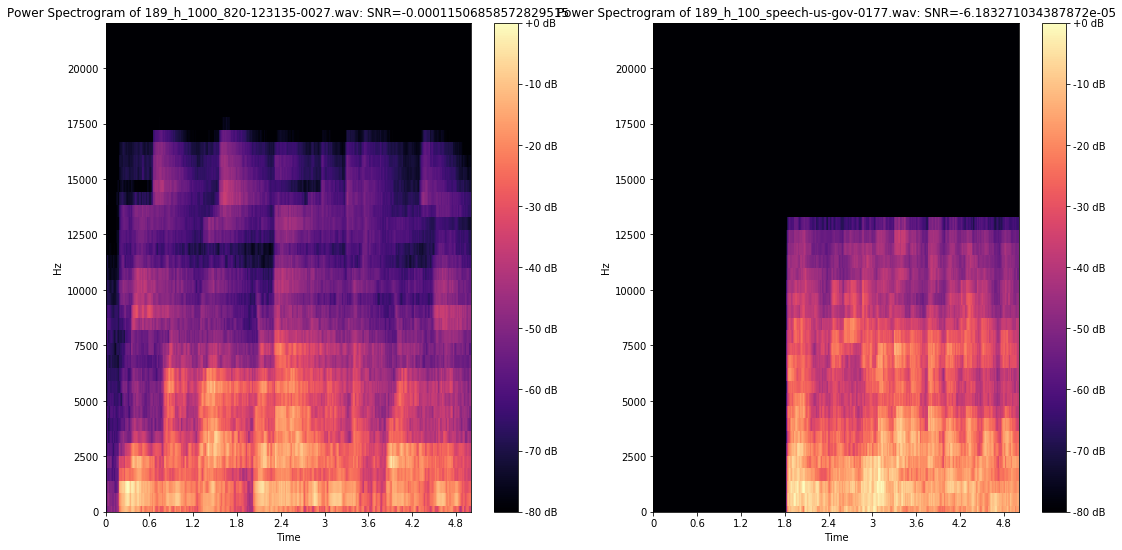

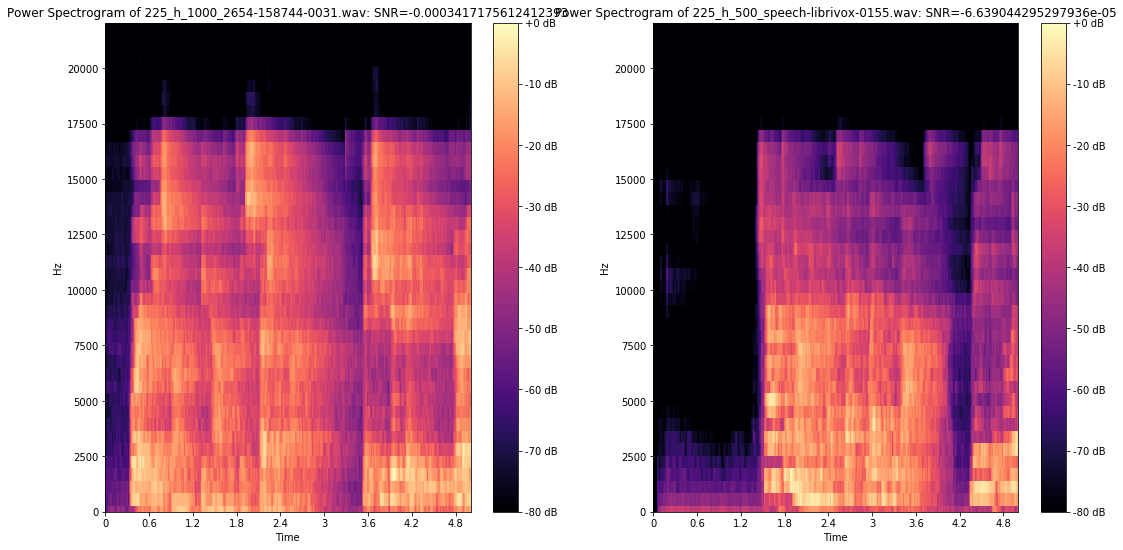

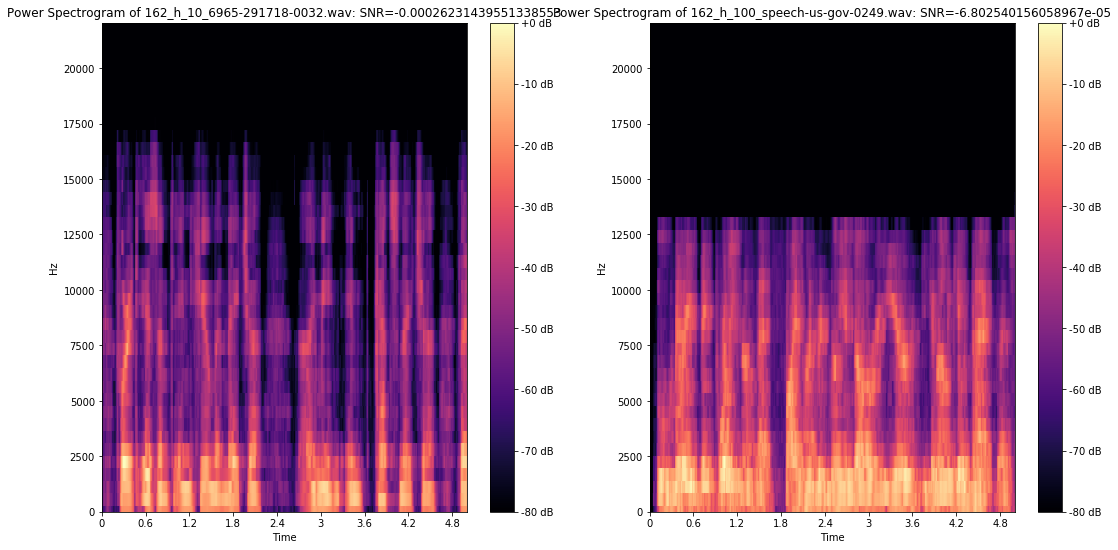

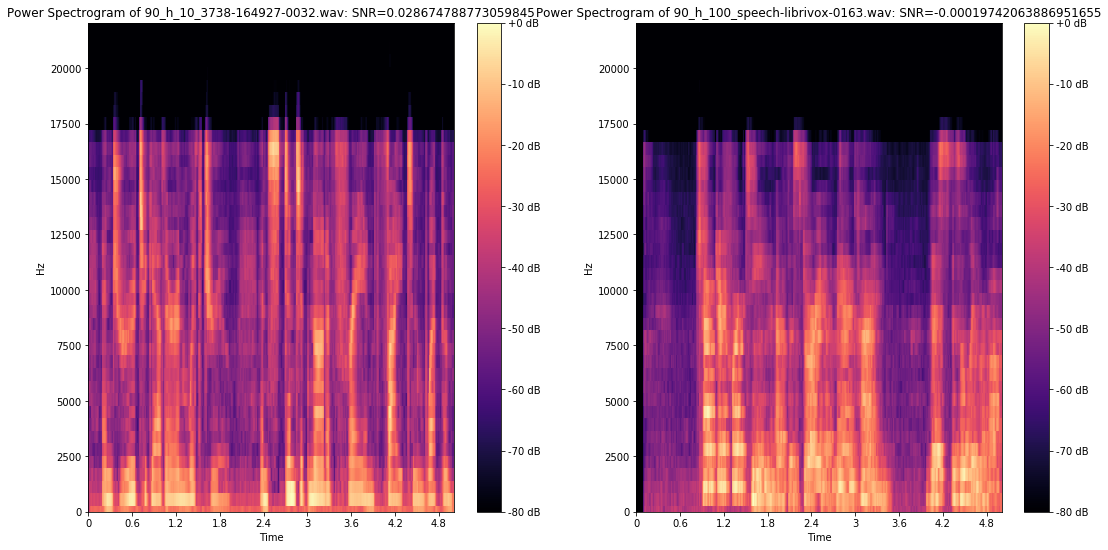

In [60]:
# randomly select a couple of music and speech singals and compare their PSD
randomFolder = random.sample(range(0,40),20)
randomIndexes = random.sample(range(0,1000),20)
for index in range(20):
    basedirM = f'D:/Users/MC/Documents/UNI/MASTER/thesis/AUGMENTED_DATA/data5/{int(randomFolder[index]*9)}/'
    basedirS = f'D:/Users/MC/Documents/UNI/MASTER/thesis/AUGMENTED_DATA/data7/{int(randomFolder[index]*9)}/'
    fileM = random.choice([x for x in os.listdir(basedirM) if os.path.isfile(os.path.join(basedirM, x))])
    fileS = random.choice([x for x in os.listdir(basedirS) if os.path.isfile(os.path.join(basedirS, x))])
    
    yM,sr = librosa.load(os.path.join(basedirM, fileM), sr=44100, duration=5)
    yS,sr = librosa.load(os.path.join(basedirS, fileS), sr=44100, duration=5)
    
    plt.figure(figsize=(18, 9))
    SM = librosa.feature.melspectrogram(y=yM, sr=sr, n_mels=40)
    SM_dB = librosa.power_to_db(SM, ref=np.max)
    plt.subplot(1,2,1)
    librosa.display.specshow(SM_dB, y_axis='linear', sr=sr, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Power Spectrogram of {fileM}')
    
    SS = librosa.feature.melspectrogram(y=yS, sr=sr, n_mels=40)
    SS_dB = librosa.power_to_db(SS, ref=np.max)
    plt.subplot(1,2,2)
    librosa.display.specshow(SS_dB, y_axis='linear', sr=sr, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Power Spectrogram of {fileS}')

In [69]:
# randomly select a couple of music and speech singals and compare their PSD
randomFolder = random.sample(range(0,40),20)
randomIndexes = random.sample(range(0,1000),20)
for index in range(20):
    basedirM = f'D:/Users/MC/Documents/UNI/MASTER/thesis/AUGMENTED_DATA/data5/{int(randomFolder[index]*9)}/'
    basedirS = f'D:/Users/MC/Documents/UNI/MASTER/thesis/AUGMENTED_DATA/data7/{int(randomFolder[index]*9)}/'
    fileM = random.choice([x for x in os.listdir(basedirM) if os.path.isfile(os.path.join(basedirM, x))])
    fileS = random.choice([x for x in os.listdir(basedirS) if os.path.isfile(os.path.join(basedirS, x))])
    
    yM,sr = librosa.load(os.path.join(basedirM, fileM), sr=44100, duration=5)
    SM = np.abs(librosa.stft(yM))
    yMP = librosa.power_to_db(SM**2)
    yS,sr = librosa.load(os.path.join(basedirS, fileS), sr=44100, duration=5)
    SS = np.abs(librosa.stft(yS))
    yMS = librosa.power_to_db(SS**2)
    
    print(f'SNR of {fileM}: \t\t{signaltonoise(yMP)}')
    print(f'SNR of {fileS}: \t{signaltonoise(yMS)}\n')

SNR of 315_h_500_4733-6398-0002.wav: 		[-25.492195  -11.297774   -9.333043   -8.615837   -8.855726   -8.700221
  -8.366703   -7.943491   -7.816251   -7.3389726  -7.4389443  -6.957533
  -7.0952477  -6.885701   -6.8572474  -7.169738   -6.7640014  -6.5385175
  -7.188206   -7.5979247  -7.2966685  -7.5005975  -8.046771   -7.950028
  -8.630442   -8.826381   -9.033618   -9.910712   -9.493114   -9.626415
  -9.2223     -8.68814    -9.815391  -11.208121  -11.755814  -11.767966
 -11.343255  -11.2618    -12.446825  -12.315832  -14.983068  -14.882206
 -15.574237  -14.678935  -13.046089  -14.103948  -16.163696  -20.43702
 -20.920229  -17.527239  -12.80542    -9.114728   -5.750011   -2.6912482
  -1.8961881  -1.6898006  -1.6902779  -1.8526521  -1.9822625  -1.9407561
  -1.6729888  -1.6370163  -1.8064928  -1.9488578  -2.0267715  -2.0694878
  -1.8349886  -1.5117403  -1.4286963  -1.4792333  -1.5199175  -1.5459535
  -1.5370631  -1.5113016  -1.5857667  -1.6174252  -1.6307228  -1.4897528
  -1.4305722  -1.494

C:\Users\MC\anaconda3\envs\GPU\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


SNR of 117_h_500_7594-91192-0020.wav: 		[-17.041594   -6.7273717  -5.0588455  -5.05513    -5.24019    -5.498377
  -5.506097   -5.879204   -5.849011   -6.0478992  -6.4447775  -6.797317
  -7.1423364  -6.9428754  -6.809872   -5.8627076  -3.6747234  -2.7828116
  -2.189833   -2.0578122  -2.0560496  -1.9998485  -1.7212468  -1.5055152
  -1.4614433  -1.4425403  -1.4407912  -1.4070309  -1.3872685  -1.4728447
  -1.6571524  -1.7676269  -1.8048106  -1.7964025  -1.8585098  -1.897788
  -1.8812869  -1.7944447  -1.7966336  -1.7596643  -1.7528467  -1.7709508
  -1.758982   -1.7183169  -1.667412   -1.6555551  -1.6318792  -1.5887846
  -1.5738038  -1.5426431  -1.5120385  -1.4817579  -1.488558   -1.5429127
  -1.6171246  -1.6533111  -1.6838336  -1.7101313  -1.7126585  -1.7475677
  -1.7279999  -1.6241368  -1.6734622  -1.6563314  -1.7386469  -1.7324351
  -1.726815   -1.7829808  -1.7685294  -1.7336415  -1.7056048  -1.6896201
  -1.7325188  -1.7752697  -1.754554   -1.724563   -1.6794684  -1.6531212
  -1.6549901  